In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import joblib

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/student_dropout_academic_success.csv')
df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                5.0   171.0   
1               1                15                1.0  9254.0   
2               1                 1                5.0  9070.0   
3               1                17                2.0  9773.0   
4               2                39                1.0  8014.0   

   Daytime/evening attendance\t  Previous qualification  \
0                           1.0                     1.0   
1                           1.0                     1.0   
2                           1.0                     1.0   
3                           1.0                     1.0   
4                           0.0                     1.0   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0          1.0                    19.0   
1                           160.0          1.0                     1.0   
2                           122.0          1.0                    37.0   
3                           122.0          1.0                    38.0   
4                           100.0          1.0                    37.0   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                    12.0  ...                                    0   
1                     3.0  ...                                    0   
2                    37.0  ...                                    0   
3                    37.0  ...                                    0   
4                    38.0  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
df.shape

(4424, 37)

In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

# Handling Null Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4423 non-null   float64
 3   Course                                          4422 non-null   float64
 4   Daytime/evening attendance	                     4421 non-null   float64
 5   Previous qualification                          4421 non-null   float64
 6   Previous qualification (grade)                  4419 non-null   float64
 7   Nacionality                                     4419 non-null   float64
 8   Mother's qualification                          4420 non-null   float64
 9   Father's qualification                   

In [ ]:
# Renaming columns
df.rename(columns={'Daytime/evening attendance\t': 'Day_class'}, inplace=True)
df.rename(columns={'Nacionality':'Nationality'},inplace=True)

<Axes: >

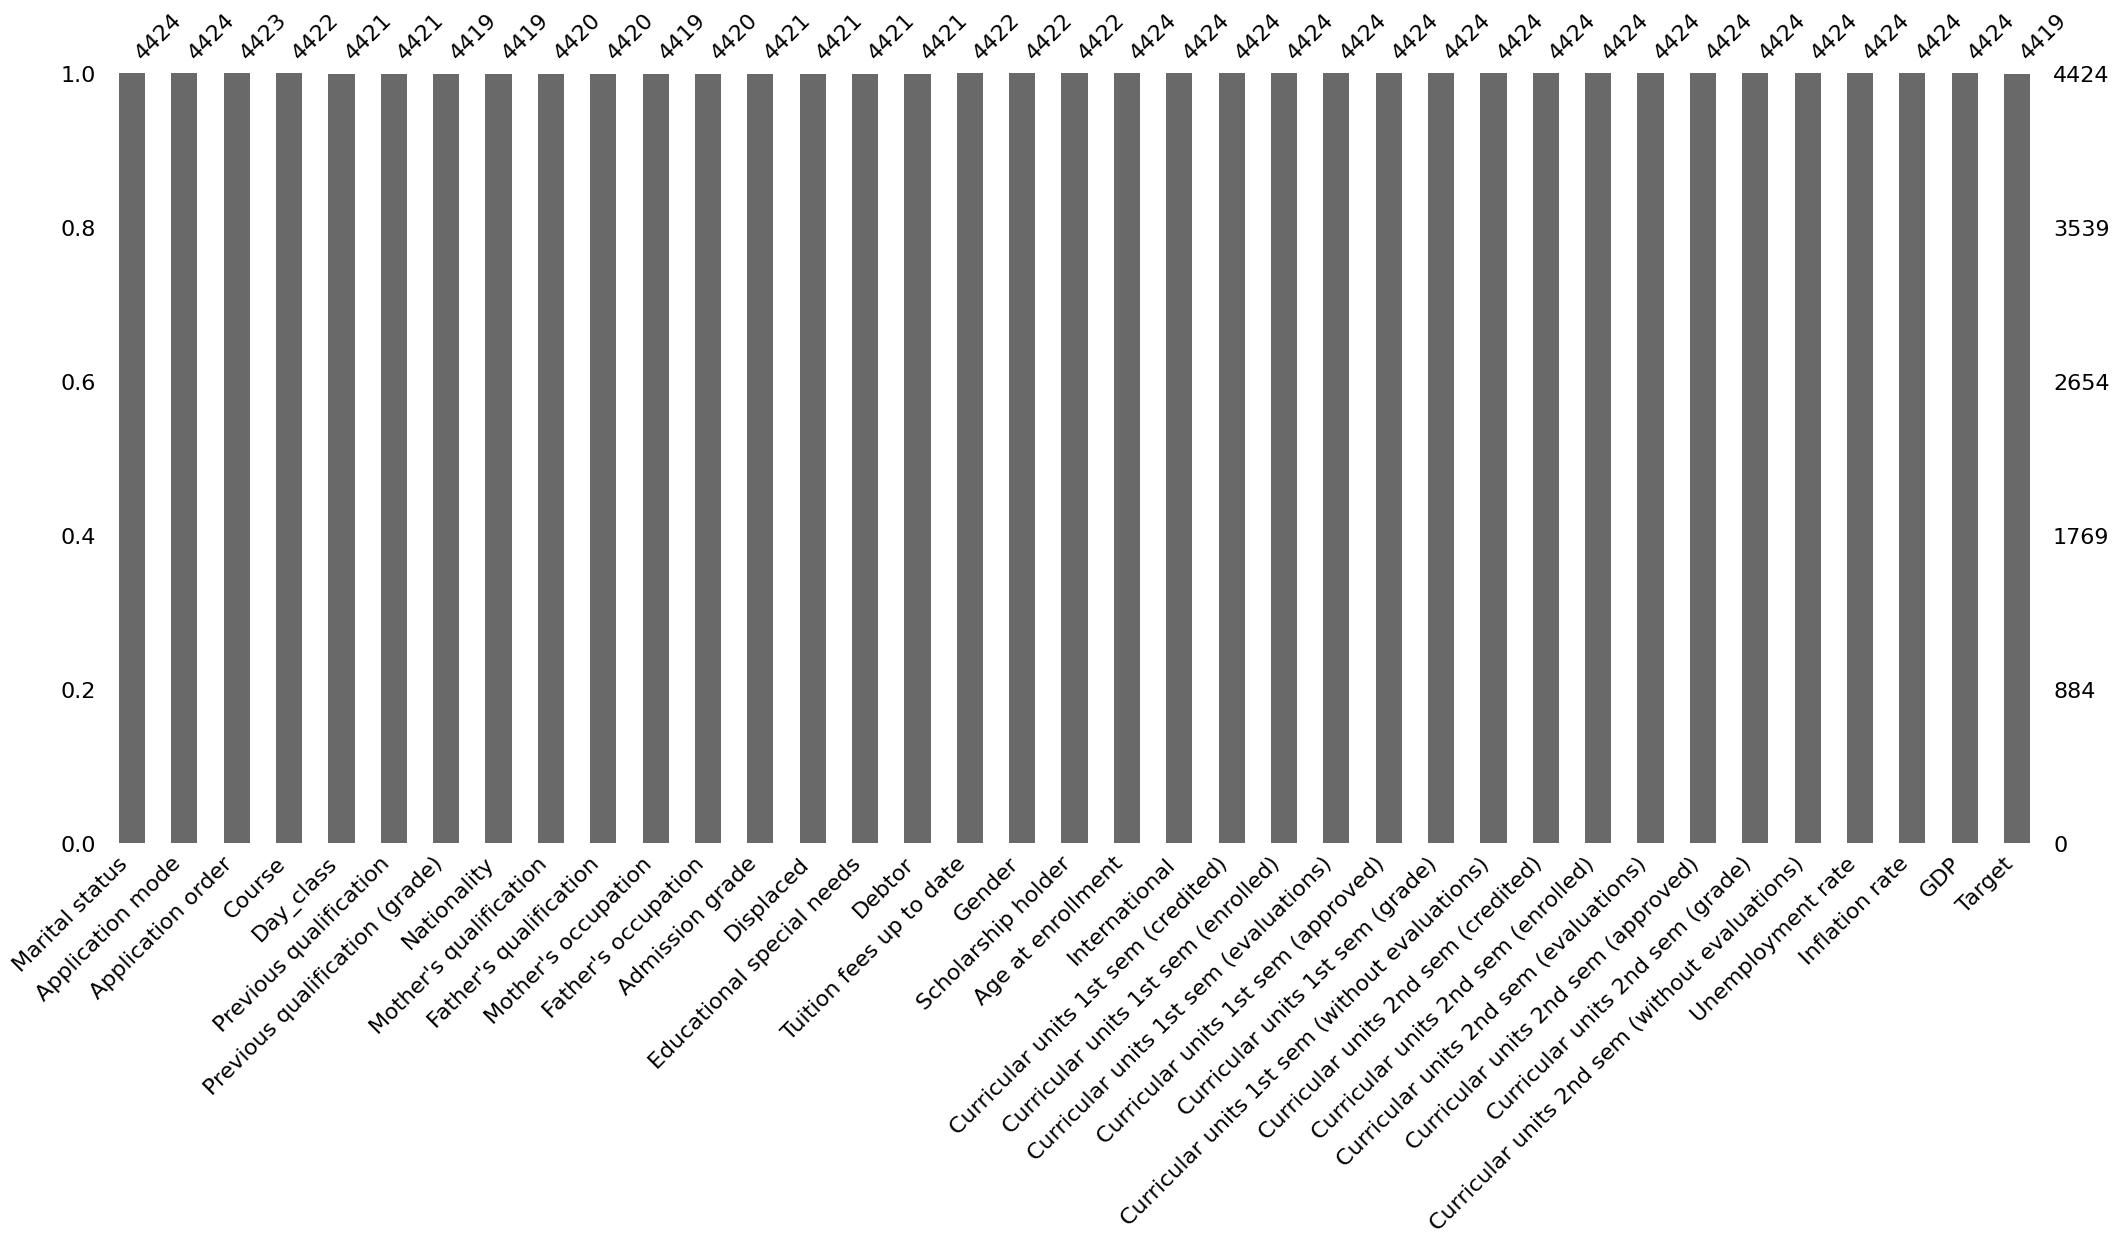

In [ ]:
msno.bar(df)

In [ ]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 1
Course                                            2
Day_class                                         3
Previous qualification                            3
Previous qualification (grade)                    5
Nationality                                       5
Mother's qualification                            4
Father's qualification                            4
Mother's occupation                               5
Father's occupation                               4
Admission grade                                   3
Displaced                                         3
Educational special needs                         3
Debtor                                            3
Tuition fees up to date                           2
Gender                                            2
Scholarship holder                                2
Age at enrollment                                 0
International                                     0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Target                                            5
dtype: int64

In [ ]:
# Cleaning all the missing values
df = df.dropna(subset=['Application order'])
df = df.dropna(subset=['Course'])
df = df.dropna(subset=['Day_class'])
df['Previous qualification (grade)'] = df['Previous qualification (grade)'].fillna(df['Previous qualification (grade)'].mean())
df = df.dropna(subset=['Nationality'])
df = df.dropna(subset=["Mother's qualification"])
df = df.dropna(subset=["Father's qualification"])
df = df.dropna(subset=["Mother's occupation"])
df = df.dropna(subset=["Father's occupation"])
df['Admission grade'] = df['Admission grade'].fillna(df['Admission grade'].mean())
df = df.dropna(subset = ['Displaced'])
df = df.dropna(subset=['Educational special needs'])
df = df.dropna(subset=['Debtor'])
df = df.dropna(subset=['Tuition fees up to date'])
df = df.dropna(subset=['Scholarship holder'])
df = df.dropna(subset=['Gender'])
df = df.dropna(subset=['Target'])

In [ ]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Day_class                                         0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Target                                            0
dtype: int64

# Data Cleaning and Feature engineering

In [ ]:
df.columns = [x.replace(" ", "_") for x in df.columns]
df.columns = [x.replace("'","") for x in df.columns]

In [ ]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Day_class', 'Previous_qualification', 'Previous_qualification_(grade)',
       'Nationality', 'Mothers_qualification', 'Fathers_qualification',
       'Mothers_occupation', 'Fathers_occupation', 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(enrolled)',
       'Curricular_units_1st_sem_(evaluations)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_1st_sem_(without_evaluations)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(enrolled)',
       'Curricular_units_2nd_sem_(evaluations)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd_sem_(grade)',
       'Curricu

In [ ]:
df.shape

(4412, 37)

In [ ]:
df['Target'].value_counts()

Target
Graduate    2203
Dropout     1417
Enrolled     792
Name: count, dtype: int64

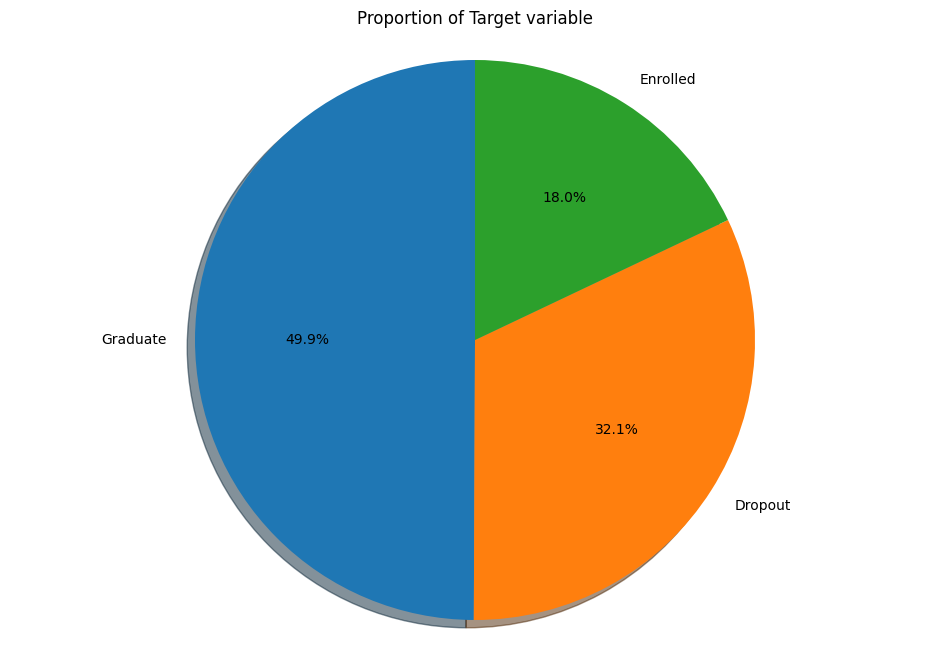

In [ ]:
# Checking the weightage of each catagory of the target
labels = 'Graduate', 'Dropout', 'Enrolled'
sizes = [df.Target[df['Target']=='Graduate'].count(), df.Target[df['Target']=='Dropout'].count(), df.Target[df['Target']=='Enrolled'].count()]
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Target variable")
plt.show()

In [ ]:
df.head()

Marital_status  Application_mode  Application_order  Course  Day_class  \
0               1                17                5.0   171.0        1.0   
1               1                15                1.0  9254.0        1.0   
2               1                 1                5.0  9070.0        1.0   
3               1                17                2.0  9773.0        1.0   
4               2                39                1.0  8014.0        0.0   

   Previous_qualification  Previous_qualification_(grade)  Nationality  \
0                     1.0                           122.0          1.0   
1                     1.0                           160.0          1.0   
2                     1.0                           122.0          1.0   
3                     1.0                           122.0          1.0   
4                     1.0                           100.0          1.0   

   Mothers_qualification  Fathers_qualification  ...  \
0                   19.0                   12.0  ...   
1                    1.0                    3.0  ...   
2                   37.0                   37.0  ...   
3                   38.0                   37.0  ...   
4                   37.0                   38.0  ...   

   Curricular_units_2nd_sem_(credited)  Curricular_units_2nd_sem_(enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

# Re-categorizing the  Column (Application_mode)

In [ ]:
df['Application_mode'].value_counts()

Application_mode
1     1701
17     870
39     784
43     311
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10       9
2        3
57       1
26       1
27       1
Name: count, dtype: int64

In [ ]:
def app_mode(x):
  maps = {1:'Admission Phases & Contingents',
          17:'Admission Phases & Contingents',
          18:'Admission Phases & Contingents',
          5:'Admission Phases & Contingents',
          16:'Admission Phases & Contingents',
          15:'Student Type & Eligibility',
          57:'Transfers & Changes',
          2:'Ordinances',
          10:'Ordinances',
          26:'Ordinances',
          27:'Ordinances',
          39:'Student Type & Eligibility',
          7:'Others',
          43:'Transfers & Changes',
          42:'Transfers & Changes',
          51:'Transfers & Changes',
          44:'Student Type & Eligibility',
          53:'Student Type & Eligibility'}

  return maps.get(x,'Outlier')

In [ ]:
df['Application_mode'] = df['Application_mode'].astype(int)
df['Application_order'] = df['Application_order'].astype(int)
df['Application_mode'] = df['Application_mode'].apply(app_mode)

In [ ]:
df['Application_mode'].value_counts()

Application_mode
Admission Phases & Contingents    2749
Student Type & Eligibility        1062
Transfers & Changes                448
Others                             139
Ordinances                          14
Name: count, dtype: int64

In [ ]:
df.head()

Marital_status                Application_mode  Application_order  Course  \
0               1  Admission Phases & Contingents                  5   171.0   
1               1      Student Type & Eligibility                  1  9254.0   
2               1  Admission Phases & Contingents                  5  9070.0   
3               1  Admission Phases & Contingents                  2  9773.0   
4               2      Student Type & Eligibility                  1  8014.0   

   Day_class  Previous_qualification  Previous_qualification_(grade)  \
0        1.0                     1.0                           122.0   
1        1.0                     1.0                           160.0   
2        1.0                     1.0                           122.0   
3        1.0                     1.0                           122.0   
4        0.0                     1.0                           100.0   

   Nationality  Mothers_qualification  Fathers_qualification  ...  \
0          1.0                   19.0                   12.0  ...   
1          1.0                    1.0                    3.0  ...   
2          1.0                   37.0                   37.0  ...   
3          1.0                   38.0                   37.0  ...   
4          1.0                   37.0                   38.0  ...   

   Curricular_units_2nd_sem_(credited)  Curricular_units_2nd_sem_(enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

# Re-Categorizing the Column (Course)

In [ ]:
df['Course'] = df['Course'].astype(int)
df['Day_class'] = df['Day_class'].astype(int)

In [ ]:
df.head()

Marital_status                Application_mode  Application_order  Course  \
0               1  Admission Phases & Contingents                  5     171   
1               1      Student Type & Eligibility                  1    9254   
2               1  Admission Phases & Contingents                  5    9070   
3               1  Admission Phases & Contingents                  2    9773   
4               2      Student Type & Eligibility                  1    8014   

   Day_class  Previous_qualification  Previous_qualification_(grade)  \
0          1                     1.0                           122.0   
1          1                     1.0                           160.0   
2          1                     1.0                           122.0   
3          1                     1.0                           122.0   
4          0                     1.0                           100.0   

   Nationality  Mothers_qualification  Fathers_qualification  ...  \
0          1.0                   19.0                   12.0  ...   
1          1.0                    1.0                    3.0  ...   
2          1.0                   37.0                   37.0  ...   
3          1.0                   38.0                   37.0  ...   
4          1.0                   37.0                   38.0  ...   

   Curricular_units_2nd_sem_(credited)  Curricular_units_2nd_sem_(enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
df['Course'].value_counts()

Course
9500    763
9147    378
9238    353
9085    337
9773    329
9670    268
9991    268
9254    250
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     85
33       12
Name: count, dtype: int64

In [ ]:
def course(x):
  maps = {
      33 : 'Agriculture/Vet',
      9003 : 'Agriculture/Vet',
      9130 : 'Agriculture/Vet',
      8014 : 'Health&Social',
      9238 : 'Health&Social',
      9500 : 'Health&Social',
      9556 : 'Health&Social',
      9853 : 'Basic Ed',
      171 : 'Arts',
      9070 : 'Arts',
      9670 : 'Des&Mul',
      9119 : 'Engg&Tech',
      9085 : 'Agriculture/Vet',
      9147 : 'Mngmt',
      9991 : 'Mngmt',
      9254 : 'Mngmt',
      9773 : 'Arts',
      9670 : 'Arts',
  }
  return maps.get(x,'Outlier')

In [ ]:
df['Course'] = df['Course'].apply(course)
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                     1.0   
1          Mngmt          1                     1.0   
2           Arts          1                     1.0   
3           Arts          1                     1.0   
4  Health&Social          0                     1.0   

   Previous_qualification_(grade)  Nationality  Mothers_qualification  \
0                           122.0          1.0                   19.0   
1                           160.0          1.0                    1.0   
2                           122.0          1.0                   37.0   
3                           122.0          1.0                   38.0   
4                           100.0          1.0                   37.0   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                   12.0  ...                                    0   
1                    3.0  ...                                    0   
2                   37.0  ...                                    0   
3                   37.0  ...                                    0   
4                   38.0  ...                                    0   

   Curricular_units_2nd_sem_(enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
df['Course'].value_counts()

Course
Health&Social      1416
Arts               1038
Mngmt               896
Agriculture/Vet     700
Basic Ed            192
Engg&Tech           170
Name: count, dtype: int64

# Re-Categorizing the Column (Previous Qualification)

In [ ]:
df['Previous_qualification'] = df['Previous_qualification'].astype(int)
df['Previous_qualification'].value_counts()

Previous_qualification
1     3706
39     219
19     161
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: count, dtype: int64

In [ ]:
def pre_ed(x):
  maps = {
      19 : 'BasicEd',
      38 : 'BasicEd',
      14 : 'SecEd',
      15 : 'SecEd',
      1 : 'SecEd',
      9 : 'SecEd',
      10 : 'SecEd',
      12 : 'SecEd',
      2 : 'HighEd',
      3 : 'HighEd',
      4 : 'HighEd',
      5 : 'HighEd',
      40 : 'HighEd',
      43 : 'HighEd',
      6 : 'VEd',
      39 : 'VEd',
      42 : 'VEd'
  }
  return maps.get(x,'Outlier')

In [ ]:
df['Previous_qualification'] = df['Previous_qualification'].apply(pre_ed)
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class Previous_qualification  \
0           Arts          1                  SecEd   
1          Mngmt          1                  SecEd   
2           Arts          1                  SecEd   
3           Arts          1                  SecEd   
4  Health&Social          0                  SecEd   

   Previous_qualification_(grade)  Nationality  Mothers_qualification  \
0                           122.0          1.0                   19.0   
1                           160.0          1.0                    1.0   
2                           122.0          1.0                   37.0   
3                           122.0          1.0                   38.0   
4                           100.0          1.0                   37.0   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                   12.0  ...                                    0   
1                    3.0  ...                                    0   
2                   37.0  ...                                    0   
3                   37.0  ...                                    0   
4                   38.0  ...                                    0   

   Curricular_units_2nd_sem_(enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
df['Previous_qualification'].value_counts()

Previous_qualification
SecEd      3769
VEd         271
HighEd      204
BasicEd     168
Name: count, dtype: int64

In [ ]:
df['Previous_qualification'] = df['Previous_qualification'].replace({'BasicEd' : 1,'SecEd':2,'HighEd':3,'VEd':4})

<ipython-input-33-96a31e1edd85>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Previous_qualification'] = df['Previous_qualification'].replace({'BasicEd' : 1,'SecEd':2,'HighEd':3,'VEd':4})


In [ ]:
df['Previous_qualification_(grade)'] = df['Previous_qualification_(grade)'].astype(int)
df['Nationality'] = df['Nationality'].astype(int)
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade)  Nationality  Mothers_qualification  \
0                             122            1                   19.0   
1                             160            1                    1.0   
2                             122            1                   37.0   
3                             122            1                   38.0   
4                             100            1                   37.0   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                   12.0  ...                                    0   
1                    3.0  ...                                    0   
2                   37.0  ...                                    0   
3                   37.0  ...                                    0   
4                   38.0  ...                                    0   

   Curricular_units_2nd_sem_(enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

# ReStructuring the column Nationality

In [ ]:
df['Nationality'].value_counts()

Nationality
1      4305
41       37
26       14
22       13
6        13
24        4
100       3
11        3
21        2
101       2
62        2
25        2
103       2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: count, dtype: int64

In [ ]:
def nation(x):
  map = {
      1: 'Europe',
      21: 'African',
      22: 'African',
      24: 'African',
      25: 'African',
      26: 'African',
      41: 'Latin',
      6: 'Europe',
      11: 'Europe',
      14: 'Europe',
      62: 'Europe',
      100: 'Europe',
      103 : 'Europe',
      105 : 'Europe',
      101 : 'Latin',
      109 : 'Latin',
      108 : 'Latin',
      2 : 'Europe',
      13 : 'Europe',
      32 : 'Europe',
      17 : 'Europe'
  }
  return map.get(x,'Outlier')

In [ ]:
df['Nationality'] = df['Nationality'].apply(nation)
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                   19.0   
1                             160      Europe                    1.0   
2                             122      Europe                   37.0   
3                             122      Europe                   38.0   
4                             100      Europe                   37.0   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                   12.0  ...                                    0   
1                    3.0  ...                                    0   
2                   37.0  ...                                    0   
3                   37.0  ...                                    0   
4                   38.0  ...                                    0   

   Curricular_units_2nd_sem_(enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
df['Nationality'].value_counts ()

Nationality
Europe     4336
Latin        41
African      35
Name: count, dtype: int64

# ReStructuring the column (Mother's and Fathers qualification)

In [ ]:
df['Mothers_qualification'] = df['Mothers_qualification'].astype(int)
df['Fathers_qualification'] = df['Fathers_qualification'].astype(int)
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                     19   
1                             160      Europe                      1   
2                             122      Europe                     37   
3                             122      Europe                     38   
4                             100      Europe                     37   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                     12  ...                                    0   
1                      3  ...                                    0   
2                     37  ...                                    0   
3                     37  ...                                    0   
4                     38  ...                                    0   

   Curricular_units_2nd_sem_(enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
def mother_edu(x):
  maps = {
      34 : 'Others',
      35 : 'BasicEd',
      36 : 'BasicEd',
      37 : 'BasicEd',
      26 : 'BasicEd',
      27 : 'SecEd',
      30 : 'BasicEd',
      38 : 'BasicEd',
      11 : 'BasicEd',
      19 : 'BasicEd',
      1 : 'SecEd',
      9 : 'SecEd',
      10 : 'SecEd',
      12 : 'SecEd',
      14 : 'SecEd',
      18 : 'SecEd',
      22 : 'SecEd',
      29 : 'BasicEd',
      39 : 'HighEd',
      42 : 'HighEd',
      2 : 'HighEd',
      3 : 'HighEd',
      4 : 'HighEd',
      5 : 'HighEd',
      40 : 'HighEd',
      41 : 'HighEd',
      43 : 'HighEd',
      44 : 'HighEd',
      6 : 'Others',
      25 : 'SecEd',
      20 : 'SecEd',
      13 : 'SecEd',
  }
  return maps.get(x,'Outlier')

In [ ]:
df['Mothers_qualification'] = df['Mothers_qualification'].apply(mother_edu)
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality Mothers_qualification  \
0                             122      Europe               BasicEd   
1                             160      Europe                 SecEd   
2                             122      Europe               BasicEd   
3                             122      Europe               BasicEd   
4                             100      Europe               BasicEd   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                     12  ...                                    0   
1                      3  ...                                    0   
2                     37  ...                                    0   
3                     37  ...                                    0   
4                     38  ...                                    0   

   Curricular_units_2nd_sem_(enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
df['Mothers_qualification'].value_counts()

Mothers_qualification
BasicEd    2533
SecEd      1126
HighEd      619
Others      134
Name: count, dtype: int64

In [ ]:
def father_edu(x):
  maps = {
      19 : 'BasicEd',
      38 : 'BasicEd',
      37 : 'BasicEd',
      29 : 'BasicEd',
      30 : 'BasicEd',
      26 : 'BasicEd',
      11 : 'BasicEd',
      35 : 'BasicEd',
      36 : 'BasicEd',
      1 : 'SecEd',
      14 : 'SecEd',
      13 : 'SecEd',
      20 : 'SecEd',
      9 : 'SecEd',
      10 : 'SecEd',
      12 : 'SecEd',
      25 : 'SecEd',
      18 : 'SecEd',
      22 : 'SecEd',
      27 : 'SecEd',
      31 : 'SecEd',
      33 : 'SecEd',
      2 : 'HighEd',
      3 : 'HighEd',
      40 : 'HighEd',
      4 : 'HighEd',
      43 : 'HighEd',
      5 : 'HighEd',
      44 : 'HighEd',
      39 : 'HighEd',
      41 : 'HighEd',
      42 : 'HighEd',
      46 : 'HighEd',
      34 : 'Others'
  }
  return maps.get(x,'Outlier')

In [ ]:
df['Fathers_qualification'] = df['Fathers_qualification'].apply(father_edu)
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality Mothers_qualification  \
0                             122      Europe               BasicEd   
1                             160      Europe                 SecEd   
2                             122      Europe               BasicEd   
3                             122      Europe               BasicEd   
4                             100      Europe               BasicEd   

  Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                 SecEd  ...                                    0   
1                HighEd  ...                                    0   
2               BasicEd  ...                                    0   
3               BasicEd  ...                                    0   
4               BasicEd  ...                                    0   

   Curricular_units_2nd_sem_(enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
df['Fathers_qualification'].value_counts()

Fathers_qualification
BasicEd    2901
SecEd       961
HighEd      436
Others      112
Outlier       2
Name: count, dtype: int64

In [ ]:
df = df[df['Fathers_qualification'] != 'Outlier']

In [ ]:
df['Mothers_qualification'] = df['Mothers_qualification'].replace({'BasicEd' : 1,'SecEd':2,'HighEd':3,'Others':0})
df['Fathers_qualification'] = df['Fathers_qualification'].replace({'BasicEd' : 1,'SecEd':2,'HighEd':3,'Others':0})
df.head()

<ipython-input-47-d1b18e83ff89>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Mothers_qualification'] = df['Mothers_qualification'].replace({'BasicEd' : 1,'SecEd':2,'HighEd':3,'Others':0})
<ipython-input-47-d1b18e83ff89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mothers_qualification'] = df['Mothers_qualification'].replace({'BasicEd' : 1,'SecEd':2,'HighEd':3,'Others':0})
<ipython-input-47-d1b18e83ff89>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ve

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                      1   
1                             160      Europe                      2   
2                             122      Europe                      1   
3                             122      Europe                      1   
4                             100      Europe                      1   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                      2  ...                                    0   
1                      3  ...                                    0   
2                      1  ...                                    0   
3                      1  ...                                    0   
4                      1  ...                                    0   

   Curricular_units_2nd_sem_(enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

# ReStructuring the column (Mothers and Fathers Occupation)

In [ ]:
df['Mothers_occupation'] = df['Mothers_occupation'].astype(int)
df['Fathers_occupation'] = df['Fathers_occupation'].astype(int)
df.head()

<ipython-input-48-f312e2877815>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mothers_occupation'] = df['Mothers_occupation'].astype(int)
<ipython-input-48-f312e2877815>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fathers_occupation'] = df['Fathers_occupation'].astype(int)


Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                      1   
1                             160      Europe                      2   
2                             122      Europe                      1   
3                             122      Europe                      1   
4                             100      Europe                      1   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                      2  ...                                    0   
1                      3  ...                                    0   
2                      1  ...                                    0   
3                      1  ...                                    0   
4                      1  ...                                    0   

   Curricular_units_2nd_sem_(enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
def class_occ(x):
  maps = {
      0 : 'Student/Undefined',
      1 : 'High',
      2 : 'High',
      3 : 'Mid',
      4 : 'Mid',
      5 : 'Service',
      6 : 'Agri',
      7 : 'Agri',
      8 : 'Unskilled',
      9 : 'Unskilled',
      10 : 'High',
      90 : 'Student/Undefined',
      99 : 'Student/Undefined',
      122 : 'High',
      123 : 'High',
      125 : 'High',
      131 : 'Mid',
      132 : 'Mid',
      134 : 'Mid',
      141 : 'Mid',
      143 : 'Mid',
      144 : 'Mid',
      151 : 'Service',
      152 : 'Service',
      153 : 'Service',
      171 : 'Agri',
      173 : 'Agri',
      175 : 'Agri',
      191 : 'Unskilled',
      192 : 'Agri',
      193 : 'Unskilled',
      194 : 'Unskilled',
  }
  return maps.get(x,'Outlier')

In [ ]:
df['Mothers_occupation'] = df['Mothers_occupation'].apply(class_occ)
df['Mothers_occupation'].value_counts()

Mothers_occupation
Unskilled            1646
Mid                  1190
Service               537
High                  433
Agri                  373
Student/Undefined     230
Outlier                 1
Name: count, dtype: int64

In [ ]:
df = df[df['Mothers_occupation'] != 'Outlier']
df['Mothers_occupation'].value_counts()

Mothers_occupation
Unskilled            1646
Mid                  1190
Service               537
High                  433
Agri                  373
Student/Undefined     230
Name: count, dtype: int64

In [ ]:
df['Mothers_occupation'] = df['Mothers_occupation'].replace({'Unskilled':1,'Agri':2,'Service':3,'Mid':4,'High':5,'Student/Undefined':0})
df.head()

<ipython-input-52-8ca65d6f771a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Mothers_occupation'] = df['Mothers_occupation'].replace({'Unskilled':1,'Agri':2,'Service':3,'Mid':4,'High':5,'Student/Undefined':0})
<ipython-input-52-8ca65d6f771a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mothers_occupation'] = df['Mothers_occupation'].replace({'Unskilled':1,'Agri':2,'Service':3,'Mid':4,'High':5,'Student/Undefined':0})


Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                      1   
1                             160      Europe                      2   
2                             122      Europe                      1   
3                             122      Europe                      1   
4                             100      Europe                      1   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                      2  ...                                    0   
1                      3  ...                                    0   
2                      1  ...                                    0   
3                      1  ...                                    0   
4                      1  ...                                    0   

   Curricular_units_2nd_sem_(enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
df['Fathers_occupation'].value_counts()

Fathers_occupation
9      1005
7       665
5       514
4       384
3       382
8       317
10      266
6       242
2       196
1       133
0       128
90       65
99       19
193      15
144       8
171       8
192       6
163       5
103       4
175       4
135       3
183       3
152       3
123       3
181       3
194       2
182       2
112       2
151       2
172       2
122       2
102       2
153       1
101       1
114       1
174       1
141       1
132       1
134       1
143       1
131       1
161       1
195       1
121       1
124       1
154       1
Name: count, dtype: int64

In [ ]:
def father_occ(x):
  maps = {
      0 : 'Other/Student',
      1: 'High',
      112: 'High',
      114: 'High',
      121: 'High',
      122: 'High',
      123: 'High',
      124: 'High',
      3 : 'Mid',
      131 : 'Mid',
      132 : 'Mid',
      134 : 'Mid',
      135 : 'Mid',
      101 : 'High',
      102 : 'High',
      152 : 'Service',
      2 : 'High',
      4: 'Mid',
      141: 'Mid',
      143: 'Mid',
      144: 'Mid',
      151: 'Service',
      153: 'Service',
      154: 'Service',
      161: 'Agri',
      171: 'Agri',
      174: 'Agri',
      175: 'Agri',
      5: 'Service',
      6: 'Agri',
      7: 'Agri',
      8: 'Agri',
      9: 'Lsw',
      10: 'High',
      103: 'High',
      163: 'Agri',
      172: 'Agri',
      181: 'Agri',
      182: 'Agri',
      183: 'Agri',
      192: 'Lsw',
      193: 'Lsw',
      194: 'Lsw',
      195: 'Service',
      90 : 'Other/Student',
      99 : 'Other/Student'
  }
  return maps.get(x,'Outlier')

In [ ]:
df['Fathers_occupation'] = df['Fathers_occupation'].apply(father_occ)
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                      1   
1                             160      Europe                      2   
2                             122      Europe                      1   
3                             122      Europe                      1   
4                             100      Europe                      1   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                      2  ...                                    0   
1                      3  ...                                    0   
2                      1  ...                                    0   
3                      1  ...                                    0   
4                      1  ...                                    0   

  Curricular_units_2nd_sem_(enrolled)  Curricular_units_2nd_sem_(evaluations)  \
0                                   0                                       0   
1                                   6                                       6   
2                                   6                                       0   
3                                   6                                      10   
4                                   6                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
df['Fathers_occupation'].value_counts()

Fathers_occupation
Agri             1253
Lsw              1028
Mid               782
High              612
Service           522
Other/Student     212
Name: count, dtype: int64

In [ ]:
df['Fathers_occupation'] = df['Fathers_occupation'].replace({'Lsw':1,'Agri':2,'Service':3,'Mid':4,'High':5,'Other/Student':0})

<ipython-input-57-fe4e9a7e961c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fathers_occupation'] = df['Fathers_occupation'].replace({'Lsw':1,'Agri':2,'Service':3,'Mid':4,'High':5,'Other/Student':0})


In [ ]:
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                      1   
1                             160      Europe                      2   
2                             122      Europe                      1   
3                             122      Europe                      1   
4                             100      Europe                      1   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                      2  ...                                    0   
1                      3  ...                                    0   
2                      1  ...                                    0   
3                      1  ...                                    0   
4                      1  ...                                    0   

   Curricular_units_2nd_sem_(enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

# Remaining Columns

In [ ]:
df['Admission_grade'] = df['Admission_grade'].astype(int)
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                      1   
1                             160      Europe                      2   
2                             122      Europe                      1   
3                             122      Europe                      1   
4                             100      Europe                      1   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                      2  ...                                    0   
1                      3  ...                                    0   
2                      1  ...                                    0   
3                      1  ...                                    0   
4                      1  ...                                    0   

   Curricular_units_2nd_sem_(enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
df['Displaced'] = df['Displaced'].astype(int)
df['Educational_special_needs'] = df['Educational_special_needs'].astype(int)
df['Debtor'] = df['Debtor'].astype(int)
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].astype(int)
df['Scholarship_holder'] = df['Scholarship_holder'].astype(int)
df['Age_at_enrollment'] = df['Age_at_enrollment'].astype(int)
df['International'] = df['International'].astype(int)

In [ ]:
df['Curricular_units_1st_sem_(credited)'].value_counts()

Curricular_units_1st_sem_(credited)
0     3832
2       94
1       85
3       69
6       51
4       47
7       41
5       41
8       31
9       27
11      17
10      15
14      15
13      13
12      12
15       5
18       4
17       3
16       3
19       2
20       2
Name: count, dtype: int64

In [ ]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Day_class', 'Previous_qualification', 'Previous_qualification_(grade)',
       'Nationality', 'Mothers_qualification', 'Fathers_qualification',
       'Mothers_occupation', 'Fathers_occupation', 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(enrolled)',
       'Curricular_units_1st_sem_(evaluations)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_1st_sem_(without_evaluations)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(enrolled)',
       'Curricular_units_2nd_sem_(evaluations)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd_sem_(grade)',
       'Curricu

# Feature Engineering

In [ ]:
df['1st_sem_failed'] = df['Curricular_units_1st_sem_(evaluations)'] - df['Curricular_units_1st_sem_(credited)']
df['2nd_sem_failed'] = df['Curricular_units_2nd_sem_(evaluations)'] - df['Curricular_units_2nd_sem_(credited)']

In [ ]:
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                      1   
1                             160      Europe                      2   
2                             122      Europe                      1   
3                             122      Europe                      1   
4                             100      Europe                      1   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(evaluations)  \
0                      2  ...                                       0   
1                      3  ...                                       6   
2                      1  ...                                       0   
3                      1  ...                                      10   
4                      1  ...                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  1st_sem_failed  2nd_sem_failed  
0             1.4  1.74   Dropout               0               0  
1            -0.3  0.79  Graduate               6               6  
2             1.4  1.74   Dropout               0               0  
3            -0.8 -3.12  Graduate               8              10  
4            -0.3  0.79  Graduate               9               6  

[5 rows x 39 columns]

In [ ]:
df.drop(columns=['Curricular_units_1st_sem_(evaluations)','Curricular_units_2nd_sem_(evaluations)'],inplace=True)
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                      1   
1                             160      Europe                      2   
2                             122      Europe                      1   
3                             122      Europe                      1   
4                             100      Europe                      1   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(enrolled)  \
0                      2  ...                                    0   
1                      3  ...                                    6   
2                      1  ...                                    6   
3                      1  ...                                    6   
4                      1  ...                                    6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  1st_sem_failed  2nd_sem_failed  
0             1.4  1.74   Dropout               0               0  
1            -0.3  0.79  Graduate               6               6  
2             1.4  1.74   Dropout               0               0  
3            -0.8 -3.12  Graduate               8              10  
4            -0.3  0.79  Graduate               9               6  

[5 rows x 37 columns]

In [ ]:
df.rename(columns={'Gender' : 'Male'}, inplace=True)
df['Male'] = df['Male'].astype(int)

In [ ]:
df.drop(columns=['Curricular_units_1st_sem_(enrolled)','Curricular_units_2nd_sem_(enrolled)'],inplace=True)
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                      1   
1                             160      Europe                      2   
2                             122      Europe                      1   
3                             122      Europe                      1   
4                             100      Europe                      1   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                      2  ...                                    0   
1                      3  ...                                    0   
2                      1  ...                                    0   
3                      1  ...                                    0   
4                      1  ...                                    0   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  1st_sem_failed  2nd_sem_failed  
0             1.4  1.74   Dropout               0               0  
1            -0.3  0.79  Graduate               6               6  
2             1.4  1.74   Dropout               0               0  
3            -0.8 -3.12  Graduate               8              10  
4            -0.3  0.79  Graduate               9               6  

[5 rows x 35 columns]

In [ ]:
df['Total_missed_or_dropped_units'] = df['Curricular_units_1st_sem_(without_evaluations)'] + df['Curricular_units_2nd_sem_(without_evaluations)']
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                      1   
1                             160      Europe                      2   
2                             122      Europe                      1   
3                             122      Europe                      1   
4                             100      Europe                      1   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(approved)  \
0                      2  ...                                    0   
1                      3  ...                                    6   
2                      1  ...                                    0   
3                      1  ...                                    5   
4                      1  ...                                    6   

   Curricular_units_2nd_sem_(grade)  \
0                          0.000000   
1                         13.666667   
2                          0.000000   
3                         12.400000   
4                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  1st_sem_failed  2nd_sem_failed  \
0             1.4  1.74   Dropout               0               0   
1            -0.3  0.79  Graduate               6               6   
2             1.4  1.74   Dropout               0               0   
3            -0.8 -3.12  Graduate               8              10   
4            -0.3  0.79  Graduate               9               6   

   Total_missed_or_dropped_units  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 36 columns]

In [ ]:
df.drop(columns=['Curricular_units_1st_sem_(without_evaluations)','Curricular_units_2nd_sem_(without_evaluations)'],inplace=True)
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                      1   
1                             160      Europe                      2   
2                             122      Europe                      1   
3                             122      Europe                      1   
4                             100      Europe                      1   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                      2  ...                                    0   
1                      3  ...                                    0   
2                      1  ...                                    0   
3                      1  ...                                    0   
4                      1  ...                                    0   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Unemployment_rate  Inflation_rate   GDP    Target  1st_sem_failed  \
0               10.8             1.4  1.74   Dropout               0   
1               13.9            -0.3  0.79  Graduate               6   
2               10.8             1.4  1.74   Dropout               0   
3                9.4            -0.8 -3.12  Graduate               8   
4               13.9            -0.3  0.79  Graduate               9   

   2nd_sem_failed  Total_missed_or_dropped_units  
0               0                              0  
1               6                              0  
2               0                              0  
3              10                              0  
4               6                              0  

[5 rows x 34 columns]

In [ ]:
df['Total_failed_units'] = df['1st_sem_failed'] + df['2nd_sem_failed']
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                      1   
1                             160      Europe                      2   
2                             122      Europe                      1   
3                             122      Europe                      1   
4                             100      Europe                      1   

   Fathers_qualification  ...  Curricular_units_2nd_sem_(approved)  \
0                      2  ...                                    0   
1                      3  ...                                    6   
2                      1  ...                                    0   
3                      1  ...                                    5   
4                      1  ...                                    6   

   Curricular_units_2nd_sem_(grade)  Unemployment_rate  Inflation_rate   GDP  \
0                          0.000000               10.8             1.4  1.74   
1                         13.666667               13.9            -0.3  0.79   
2                          0.000000               10.8             1.4  1.74   
3                         12.400000                9.4            -0.8 -3.12   
4                         13.000000               13.9            -0.3  0.79   

     Target  1st_sem_failed  2nd_sem_failed  Total_missed_or_dropped_units  \
0   Dropout               0               0                              0   
1  Graduate               6               6                              0   
2   Dropout               0               0                              0   
3  Graduate               8              10                              0   
4  Graduate               9               6                              0   

   Total_failed_units  
0                   0  
1                  12  
2                   0  
3                  18  
4                  15  

[5 rows x 35 columns]

In [ ]:
df.drop(columns=['1st_sem_failed','2nd_sem_failed'],inplace=True)
df.head()

Marital_status                Application_mode  Application_order  \
0               1  Admission Phases & Contingents                  5   
1               1      Student Type & Eligibility                  1   
2               1  Admission Phases & Contingents                  5   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   

          Course  Day_class  Previous_qualification  \
0           Arts          1                       2   
1          Mngmt          1                       2   
2           Arts          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
0                             122      Europe                      1   
1                             160      Europe                      2   
2                             122      Europe                      1   
3                             122      Europe                      1   
4                             100      Europe                      1   

   Fathers_qualification  ...  Curricular_units_1st_sem_(grade)  \
0                      2  ...                          0.000000   
1                      3  ...                         14.000000   
2                      1  ...                          0.000000   
3                      1  ...                         13.428571   
4                      1  ...                         12.333333   

   Curricular_units_2nd_sem_(credited)  Curricular_units_2nd_sem_(approved)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    0   
3                                    0                                    5   
4                                    0                                    6   

   Curricular_units_2nd_sem_(grade)  Unemployment_rate  Inflation_rate   GDP  \
0                          0.000000               10.8             1.4  1.74   
1                         13.666667               13.9            -0.3  0.79   
2                          0.000000               10.8             1.4  1.74   
3                         12.400000                9.4            -0.8 -3.12   
4                         13.000000               13.9            -0.3  0.79   

     Target  Total_missed_or_dropped_units  Total_failed_units  
0   Dropout                              0                   0  
1  Graduate                              0                  12  
2   Dropout                              0                   0  
3  Graduate                              0                  18  
4  Graduate                              0                  15  

[5 rows x 33 columns]

In [ ]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Day_class', 'Previous_qualification', 'Previous_qualification_(grade)',
       'Nationality', 'Mothers_qualification', 'Fathers_qualification',
       'Mothers_occupation', 'Fathers_occupation', 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Male', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd_sem_(grade)', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Target', 'Total_missed_or_dropped_units',
       'Total_failed_units'],
      dtype='object')

In [ ]:
df['Unemployment_rate'].value_counts()

Unemployment_rate
7.6       569
9.4       532
10.8      524
12.4      440
12.7      419
11.1      414
15.5      396
13.9      389
8.9       367
16.2      358
9999.0      1
Name: count, dtype: int64

# Removing the Outlier in Column (Unemployment_rate)

In [ ]:
df = df[df['Unemployment_rate']!=9999.0]
print(df['Unemployment_rate'].value_counts())

Unemployment_rate
7.6     569
9.4     532
10.8    524
12.4    440
12.7    419
11.1    414
15.5    396
13.9    389
8.9     367
16.2    358
Name: count, dtype: int64


In [ ]:
df_n = df.select_dtypes(include=['float64'])

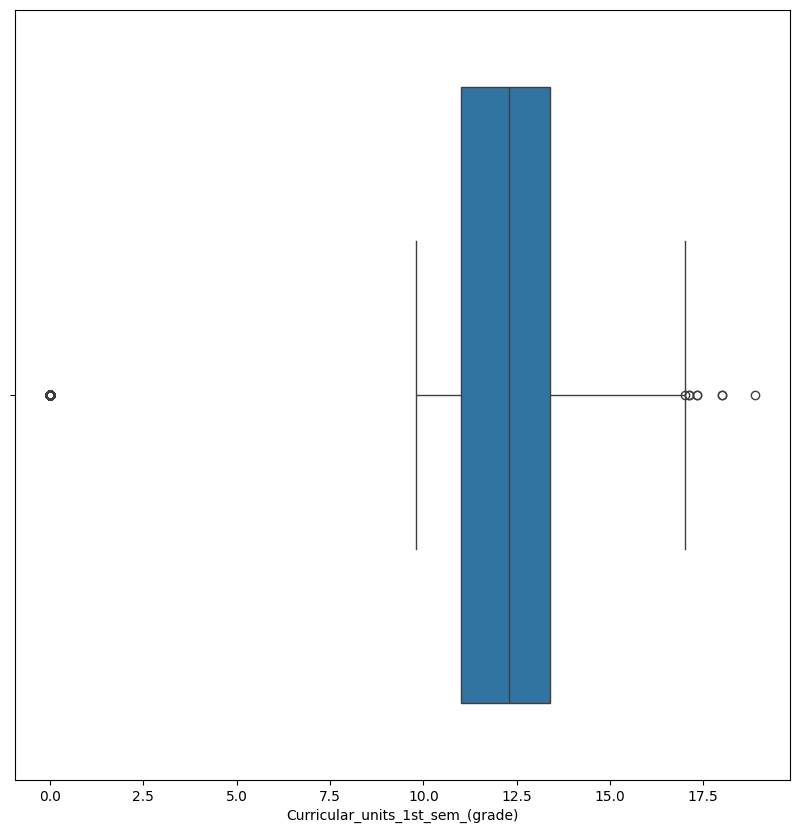

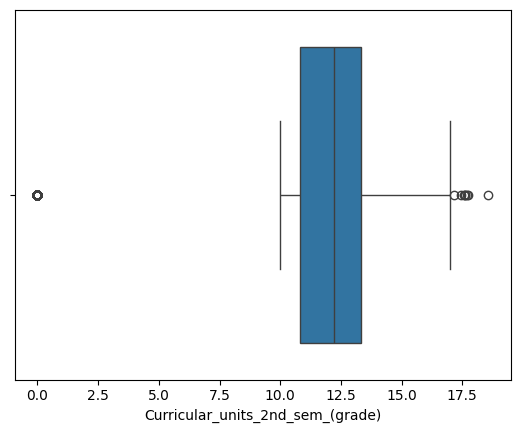

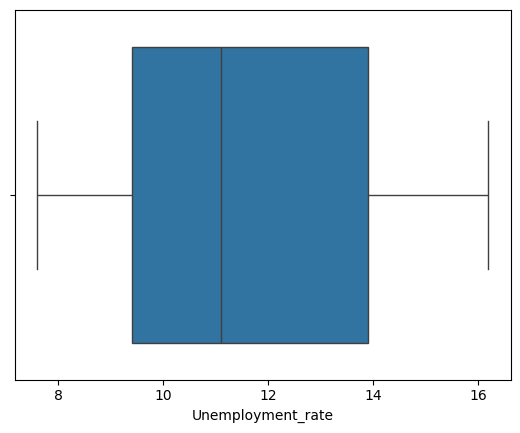

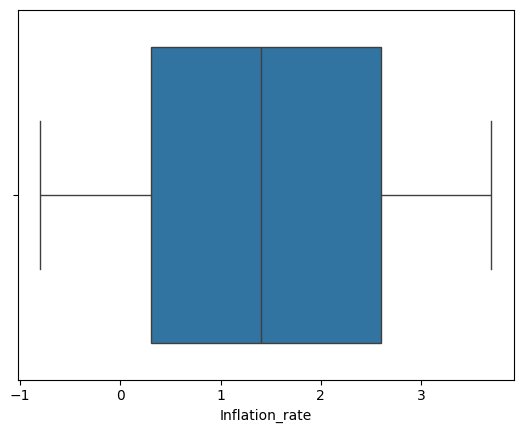

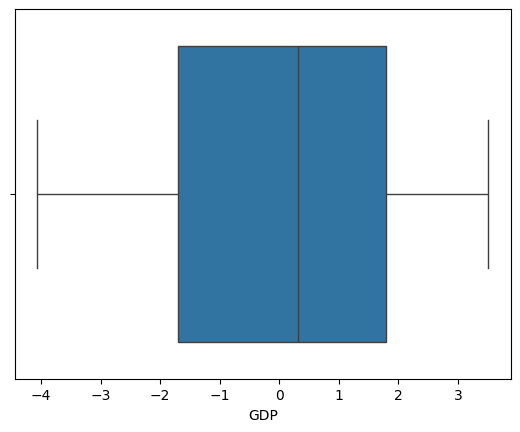

In [ ]:
plt.figure(figsize=(10,10))

for i in df_n.columns:
  sns.boxplot(df[i],orient='h')
  plt.show()

# Removing the Ouliers in the Columns by observing the above Boxplot results

In [ ]:
Q1 = df['Curricular_units_1st_sem_(grade)'].quantile(0.25)
Q3 = df['Curricular_units_1st_sem_(grade)'].quantile(0.75)

IQR = Q3 - Q1
df = df[(df['Curricular_units_1st_sem_(grade)'] >= Q1 - 3*IQR) & (df['Curricular_units_1st_sem_(grade)'] <= Q3 + 3*IQR)]

In [ ]:
Q1 = df['Curricular_units_2nd_sem_(grade)'].quantile(0.25)
Q3 = df['Curricular_units_2nd_sem_(grade)'].quantile(0.75)

IQR = Q3 - Q1
df = df[(df['Curricular_units_2nd_sem_(grade)'] >= Q1 - 3*IQR) & (df['Curricular_units_2nd_sem_(grade)'] <= Q3 + 3*IQR)]

In [ ]:
df.head()

Marital_status                Application_mode  Application_order  \
1               1      Student Type & Eligibility                  1   
3               1  Admission Phases & Contingents                  2   
4               2      Student Type & Eligibility                  1   
5               2      Student Type & Eligibility                  1   
6               1  Admission Phases & Contingents                  1   

          Course  Day_class  Previous_qualification  \
1          Mngmt          1                       2   
3           Arts          1                       2   
4  Health&Social          0                       2   
5          Mngmt          0                       1   
6  Health&Social          1                       2   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
1                             160      Europe                      2   
3                             122      Europe                      1   
4                             100      Europe                      1   
5                             133      Europe                      1   
6                             142      Europe                      1   

   Fathers_qualification  ...  Curricular_units_1st_sem_(grade)  \
1                      3  ...                         14.000000   
3                      1  ...                         13.428571   
4                      1  ...                         12.333333   
5                      1  ...                         11.857143   
6                      1  ...                         13.300000   

   Curricular_units_2nd_sem_(credited)  Curricular_units_2nd_sem_(approved)  \
1                                    0                                    6   
3                                    0                                    5   
4                                    0                                    6   
5                                    0                                    5   
6                                    0                                    8   

   Curricular_units_2nd_sem_(grade)  Unemployment_rate  Inflation_rate   GDP  \
1                         13.666667               13.9            -0.3  0.79   
3                         12.400000                9.4            -0.8 -3.12   
4                         13.000000               13.9            -0.3  0.79   
5                         11.500000               16.2             0.3 -0.92   
6                         14.345000               15.5             2.8 -4.06   

     Target  Total_missed_or_dropped_units  Total_failed_units  
1  Graduate                              0                  12  
3  Graduate                              0                  18  
4  Graduate                              0                  15  
5  Graduate                              5                  27  
6  Graduate                              0                  17  

[5 rows x 33 columns]

In [ ]:
df['Target'] = df['Target'].map({'Graduate':2, 'Dropout':0, 'Enrolled':1})

In [ ]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Day_class', 'Previous_qualification', 'Previous_qualification_(grade)',
       'Nationality', 'Mothers_qualification', 'Fathers_qualification',
       'Mothers_occupation', 'Fathers_occupation', 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Male', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd_sem_(grade)', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Target', 'Total_missed_or_dropped_units',
       'Total_failed_units'],
      dtype='object')

# Analysing the columns

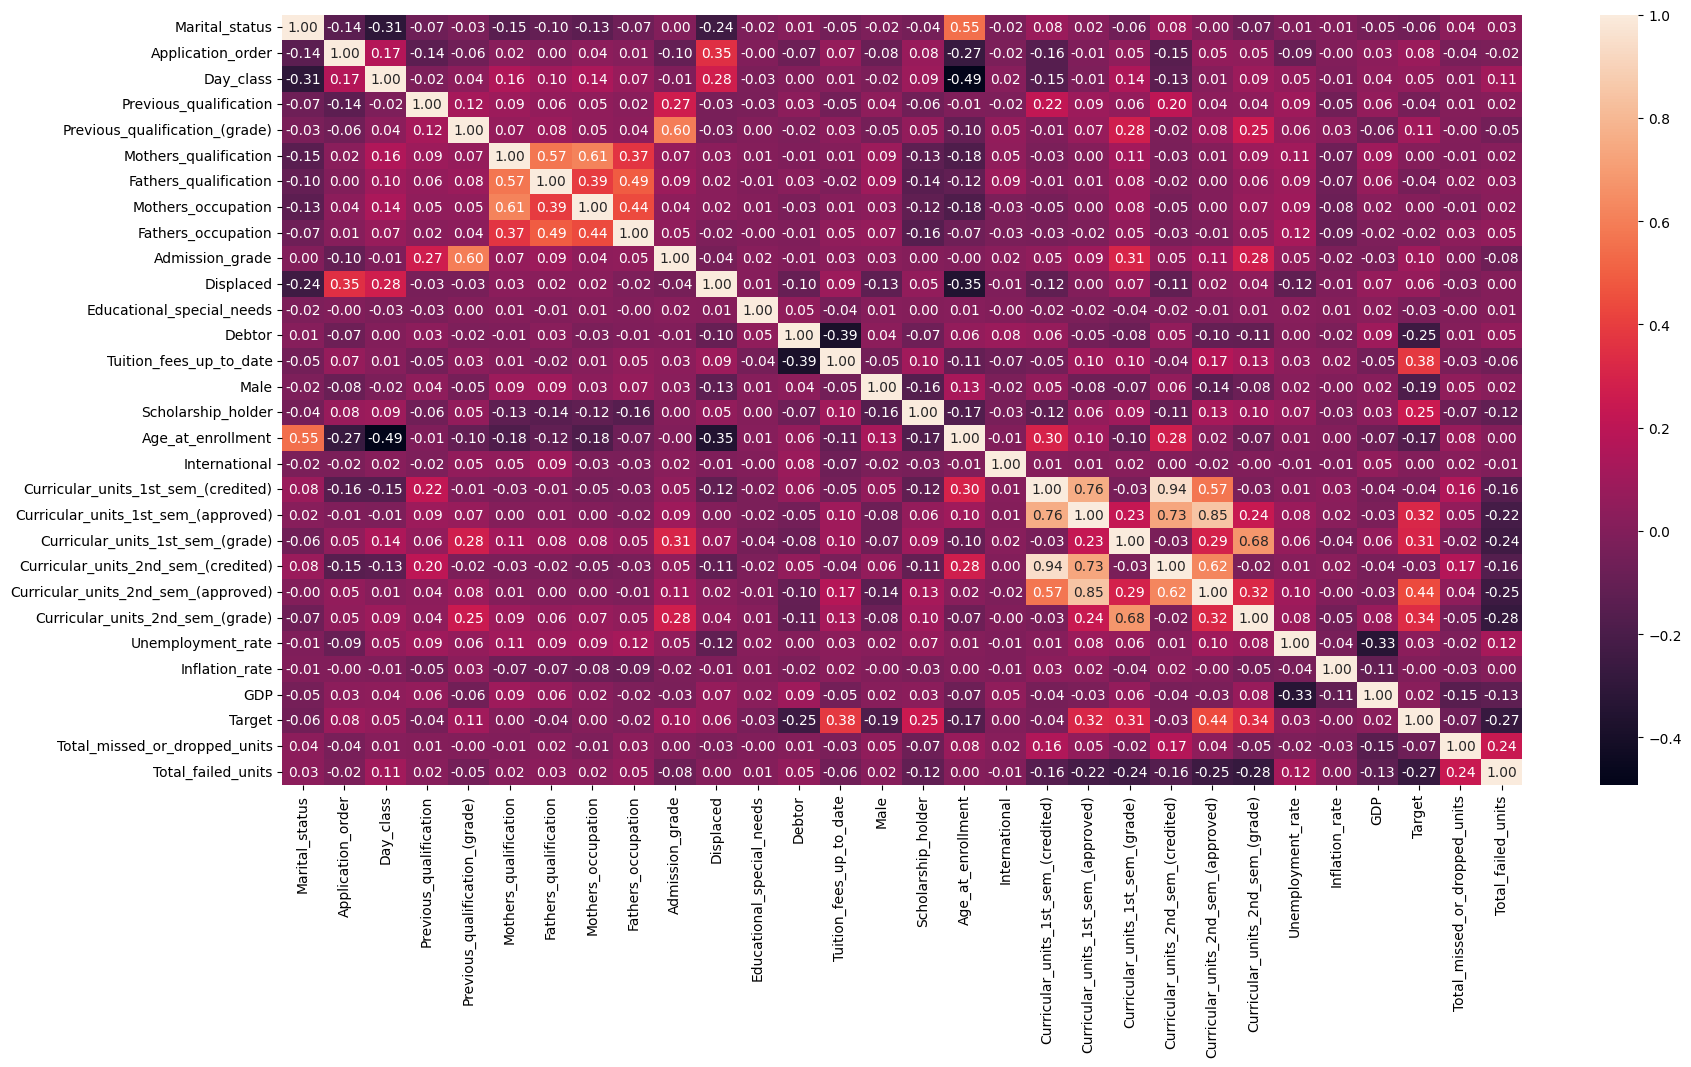

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='0.2f')
plt.show()

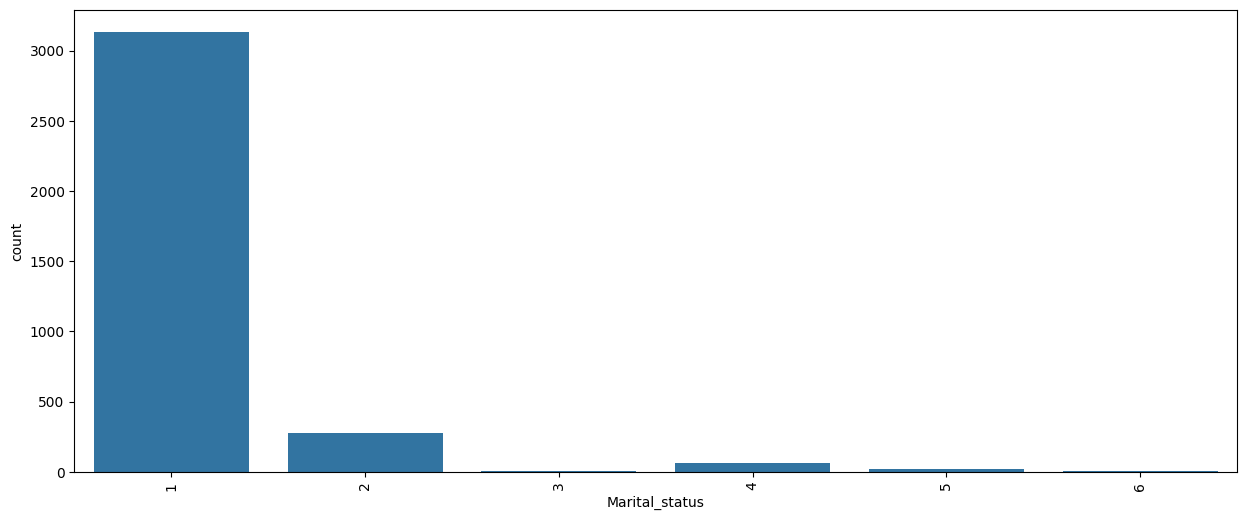

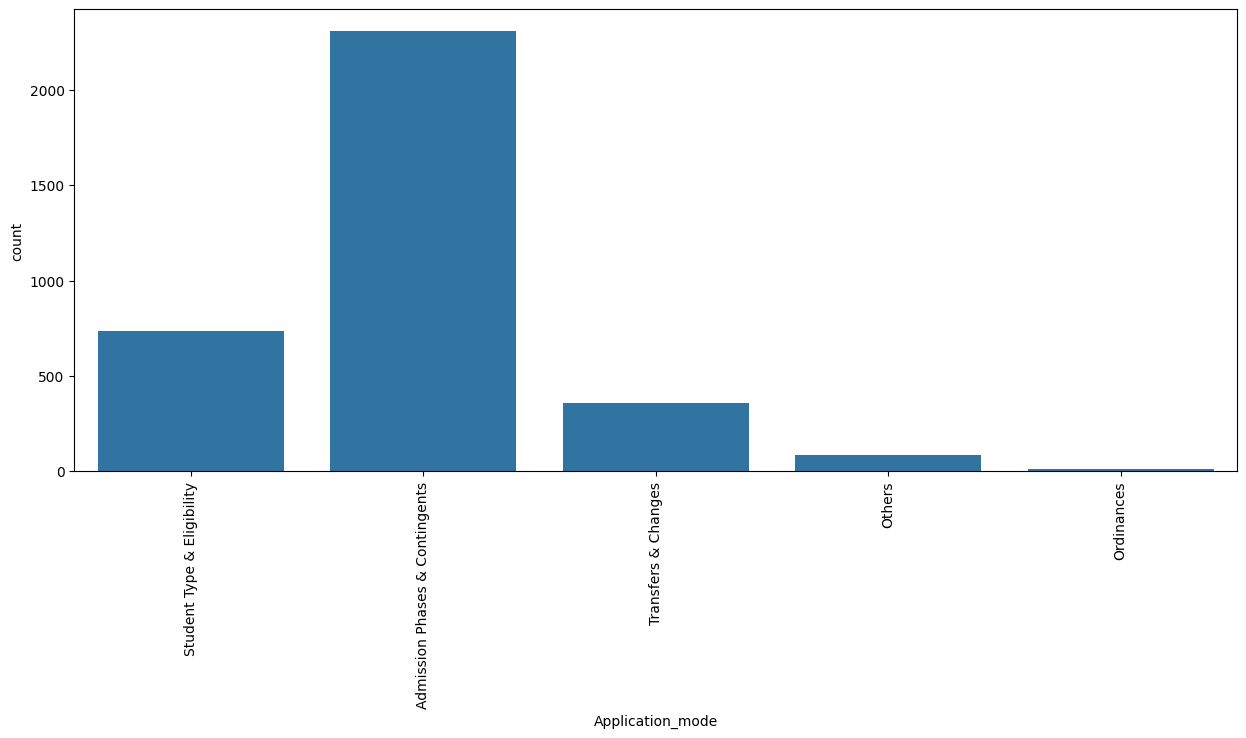

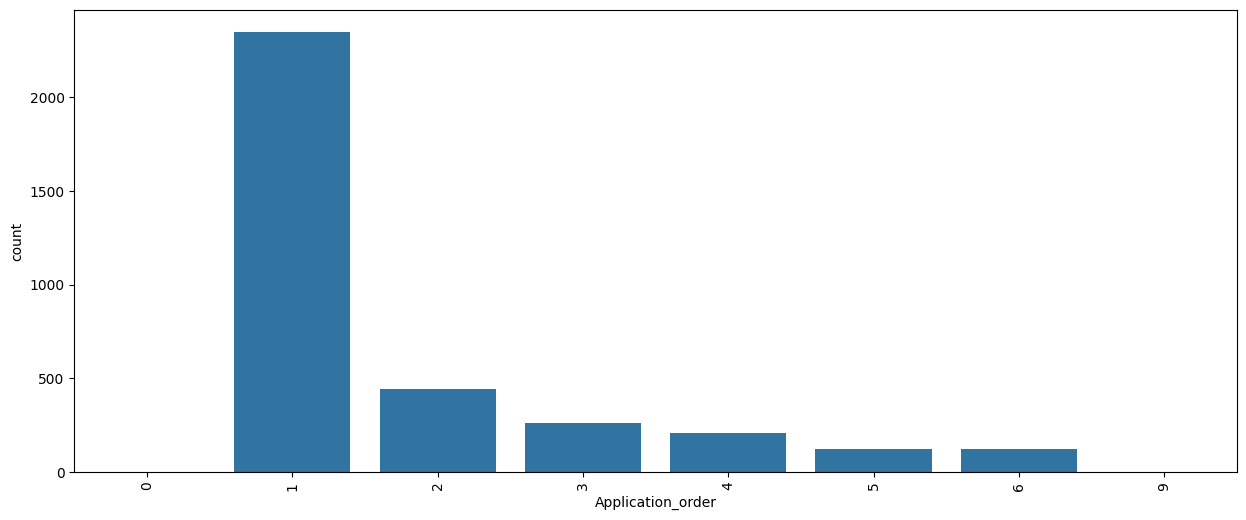

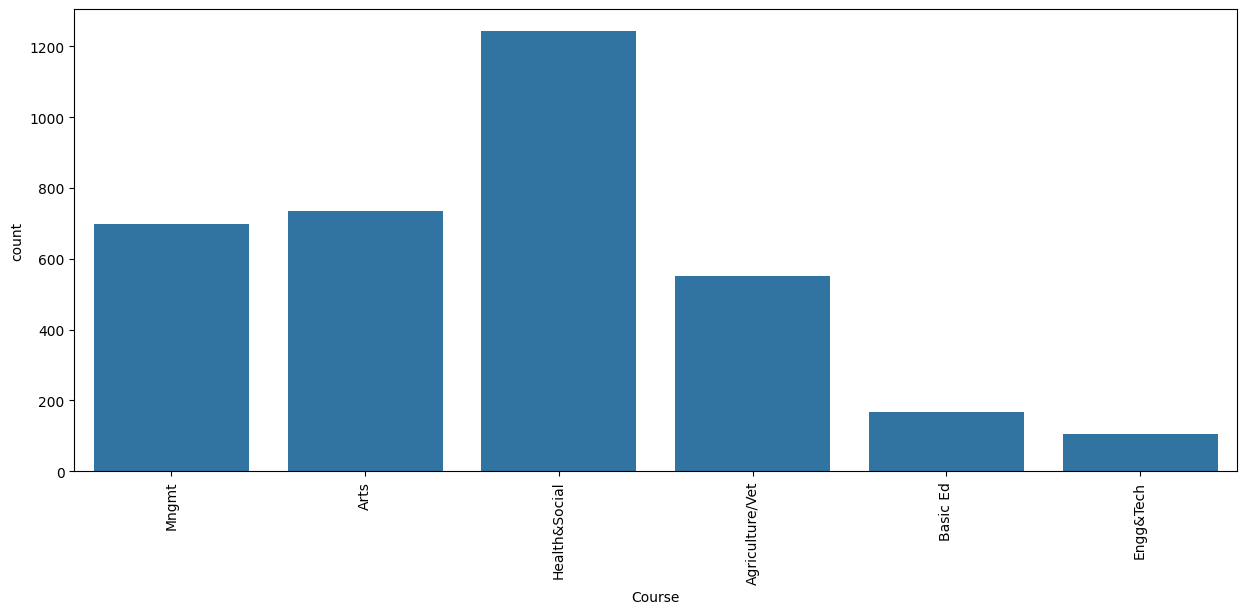

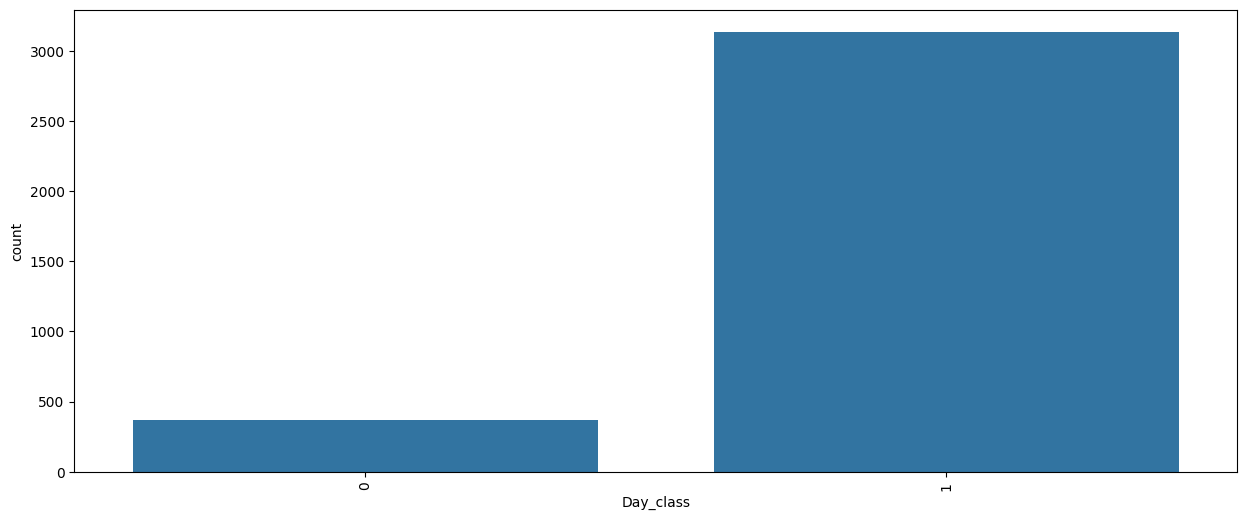

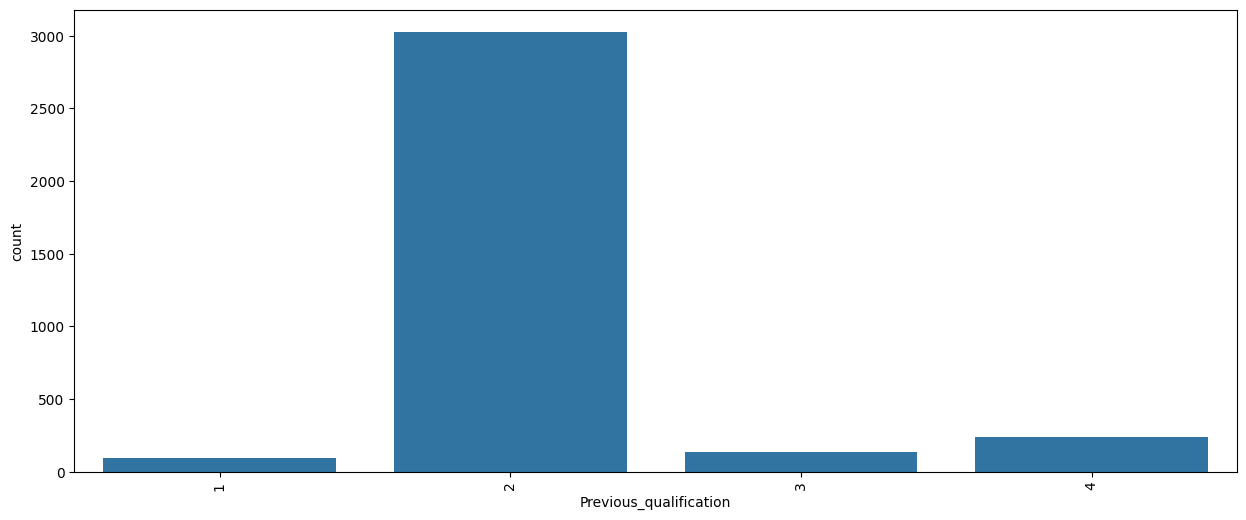

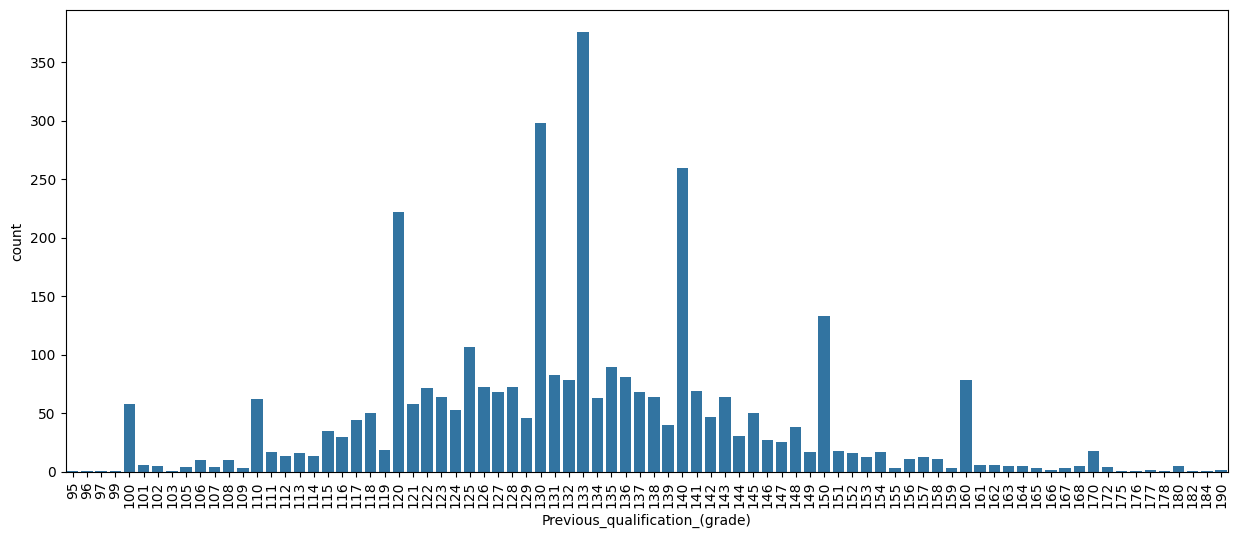

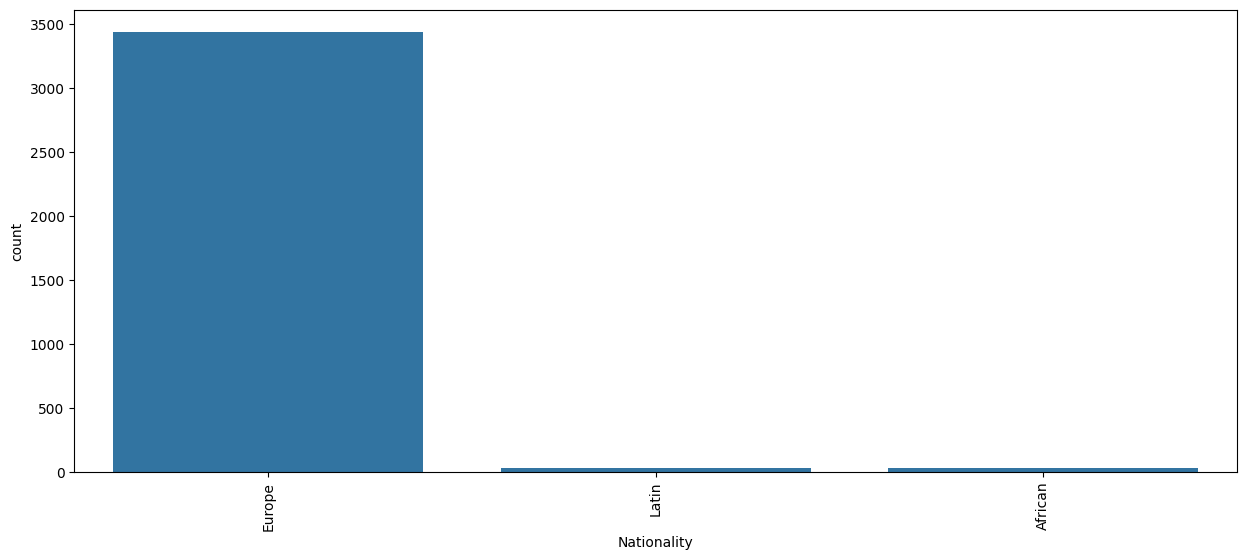

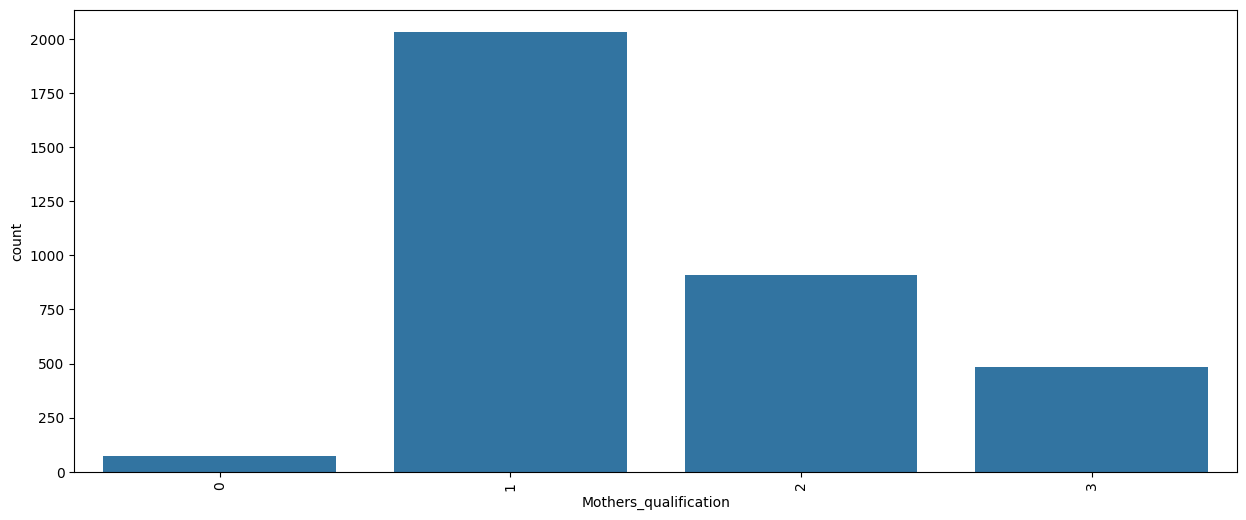

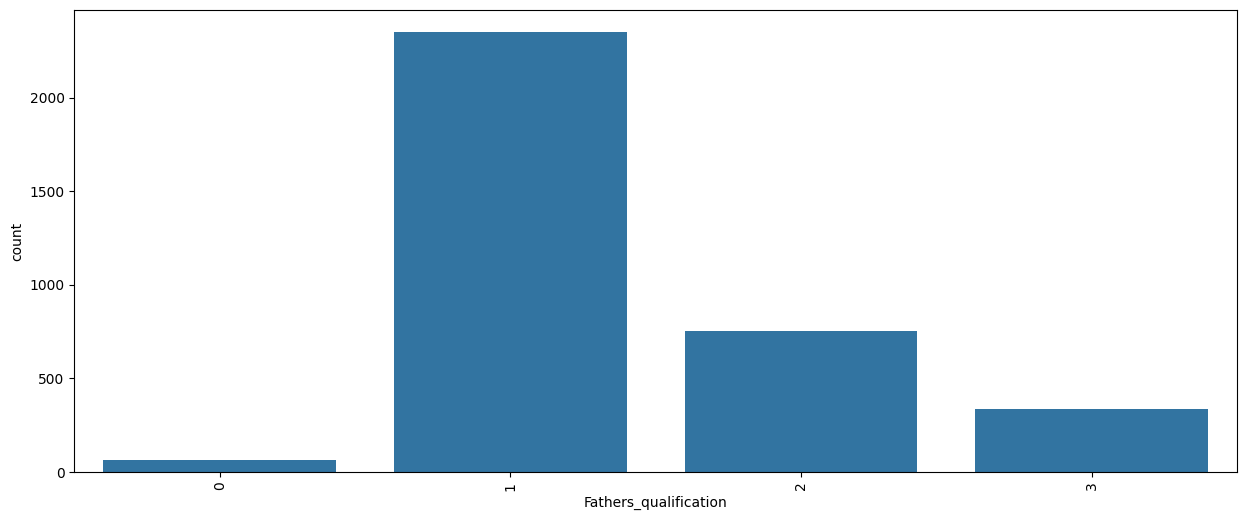

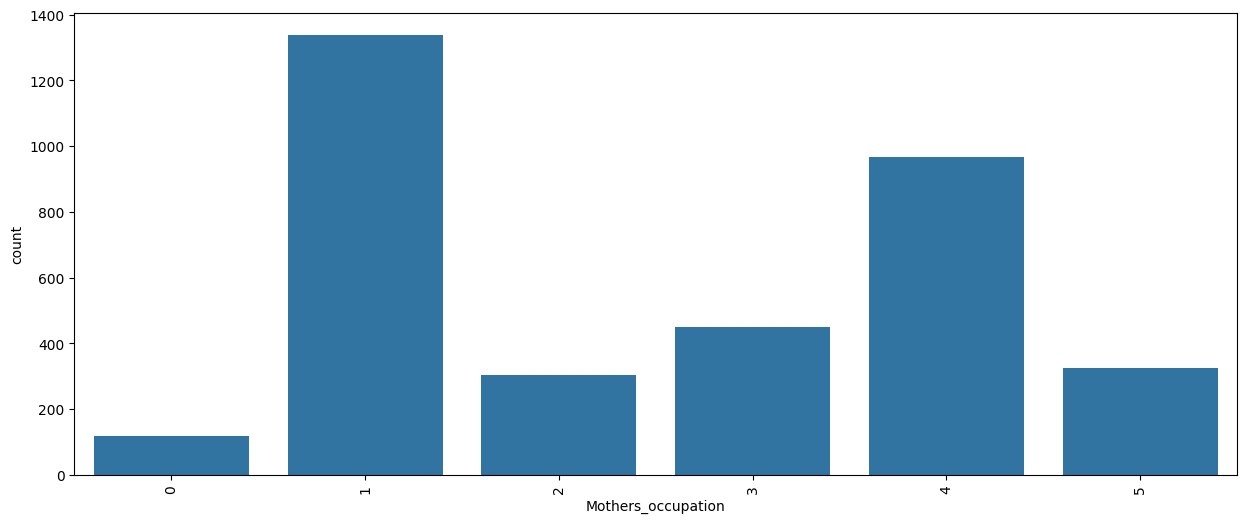

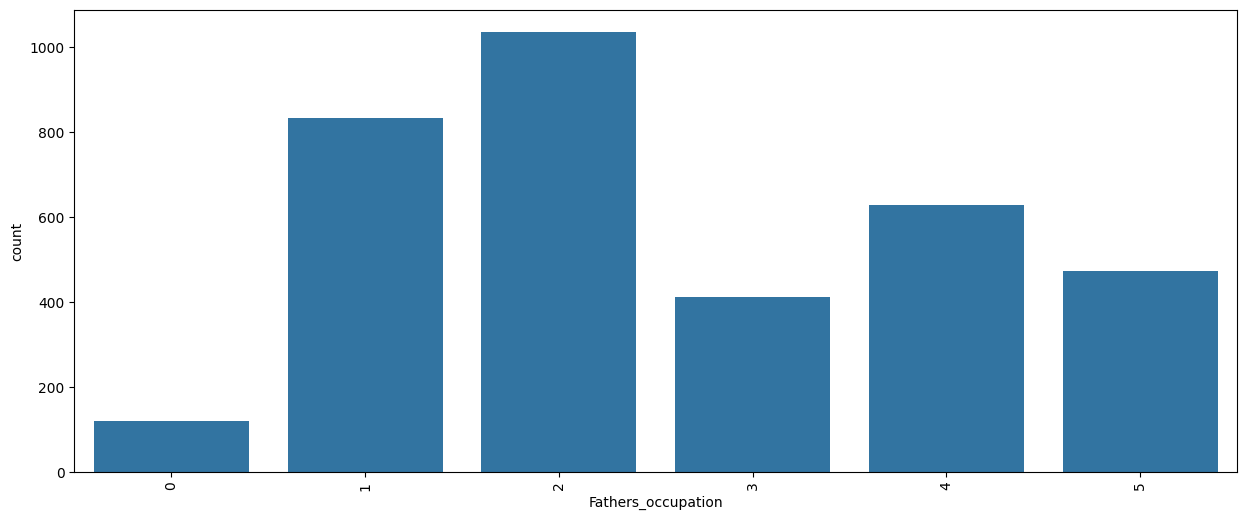

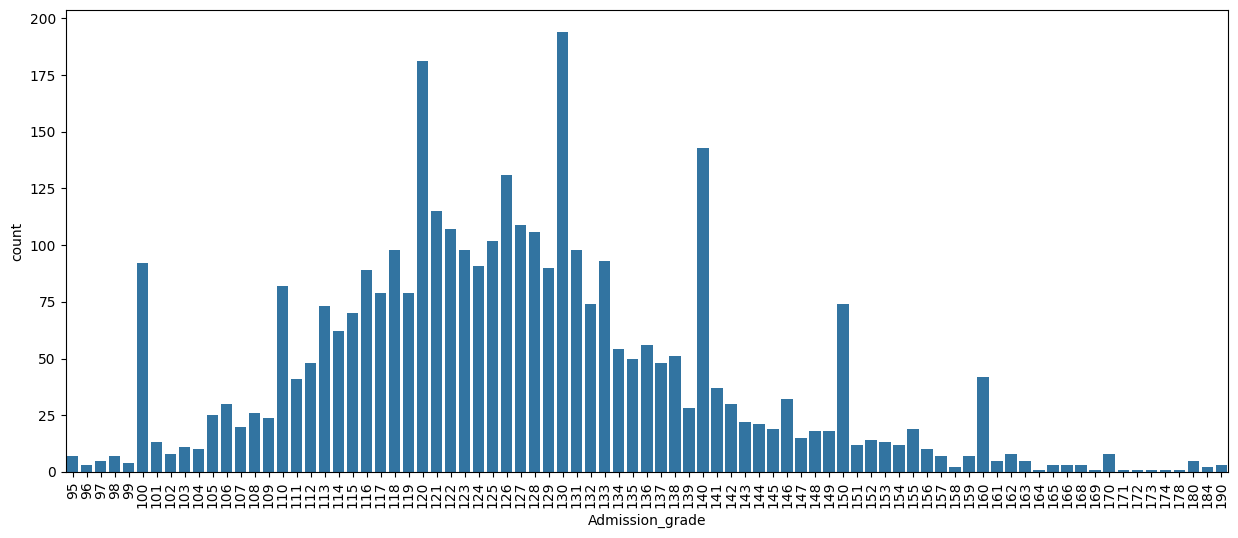

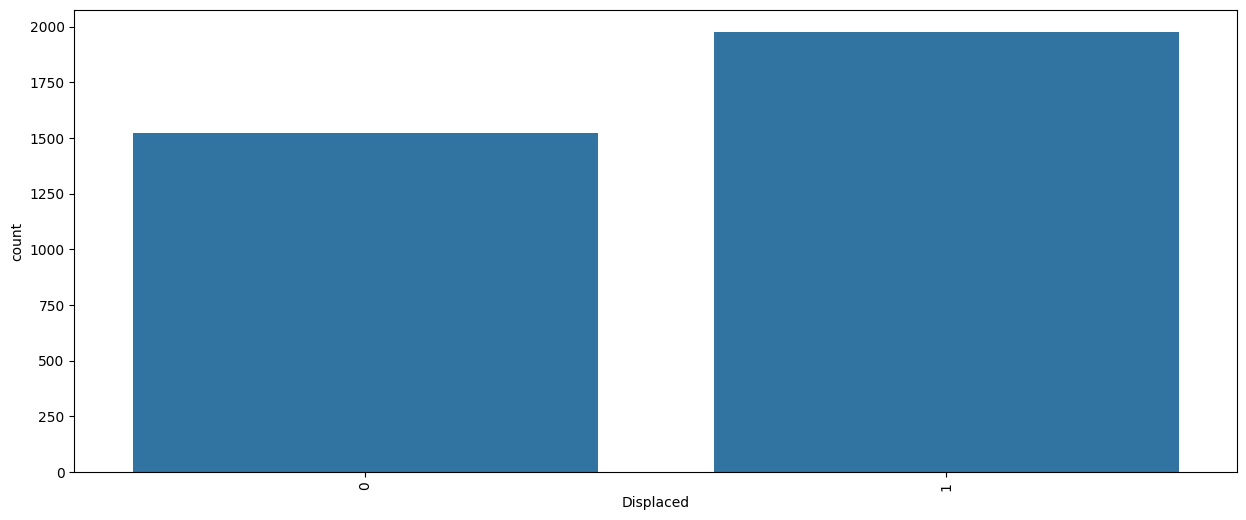

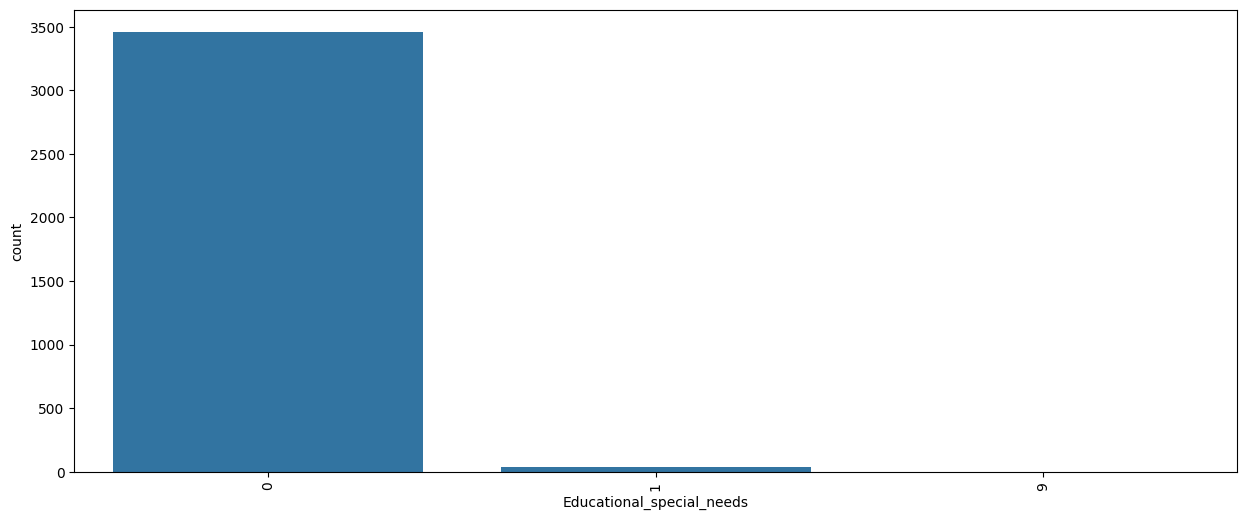

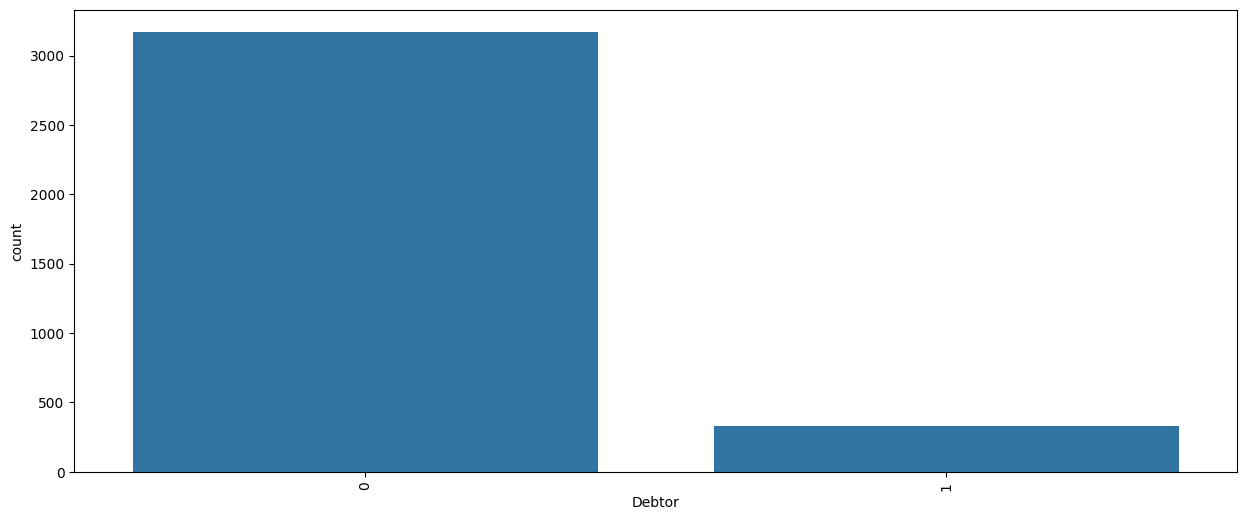

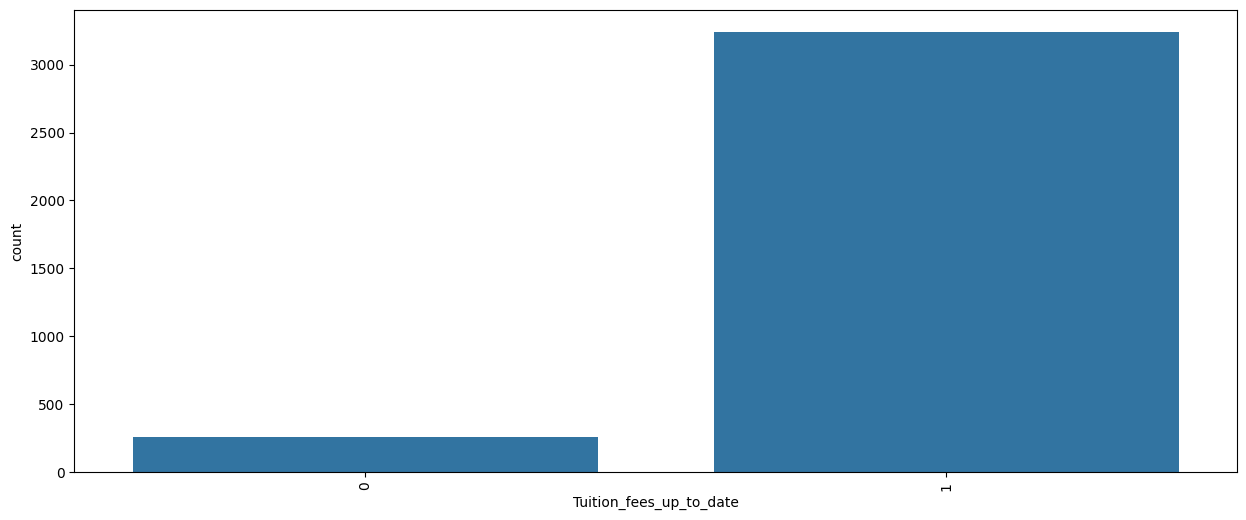

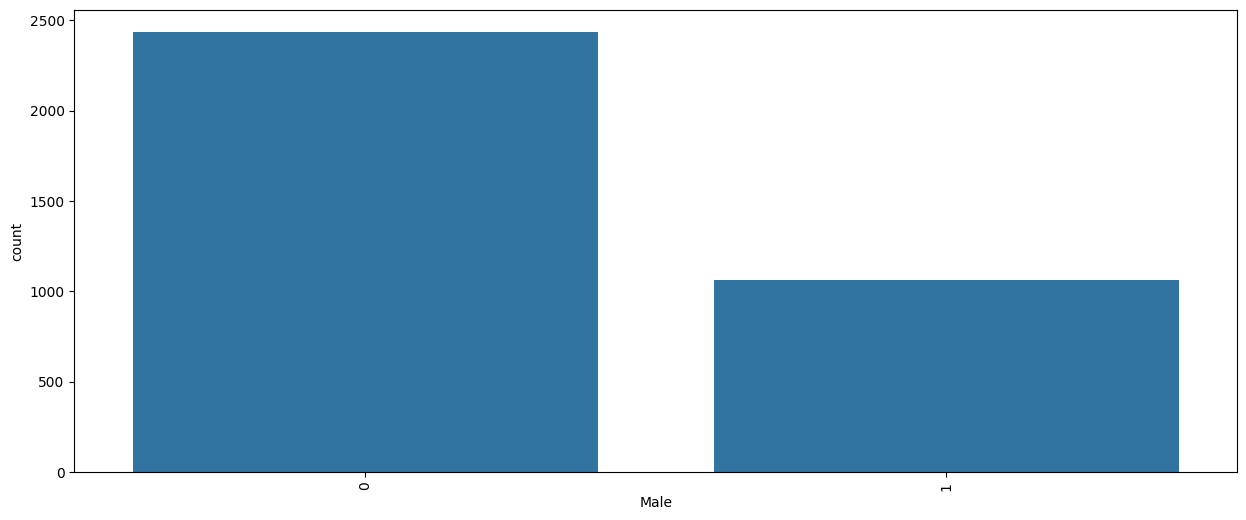

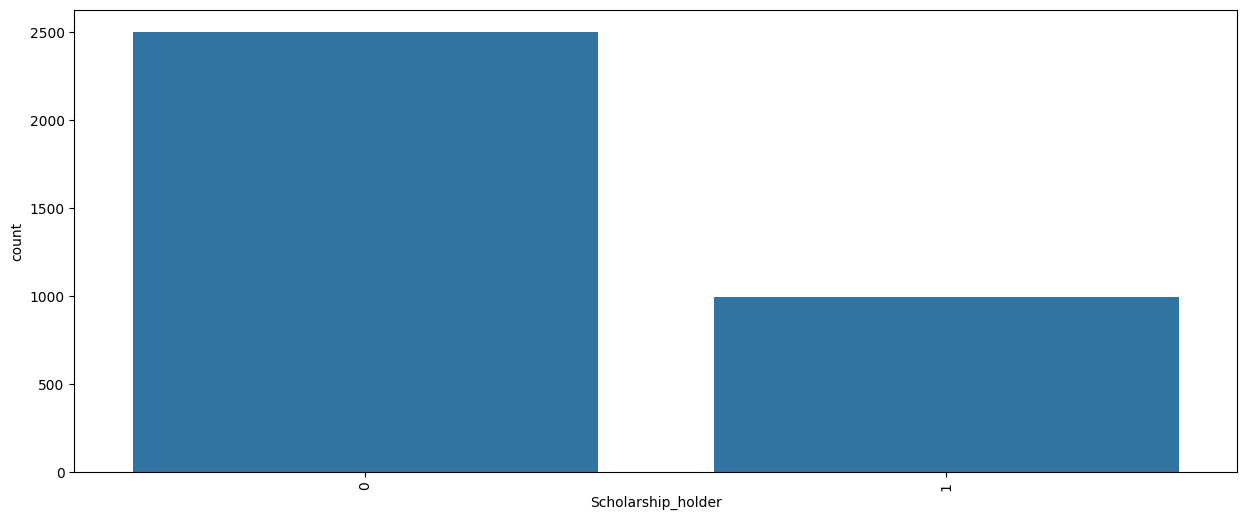

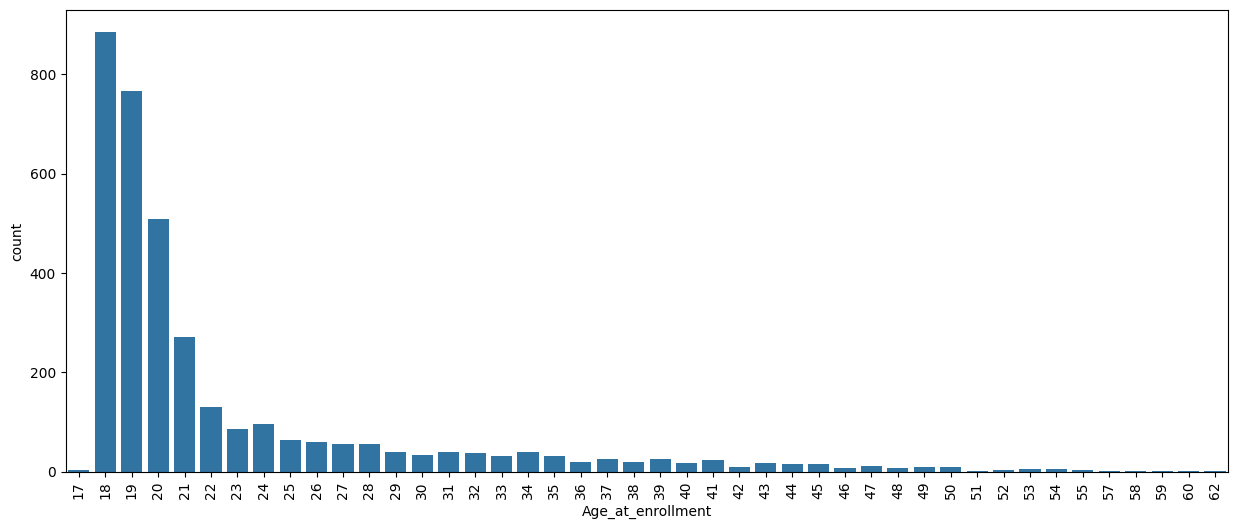

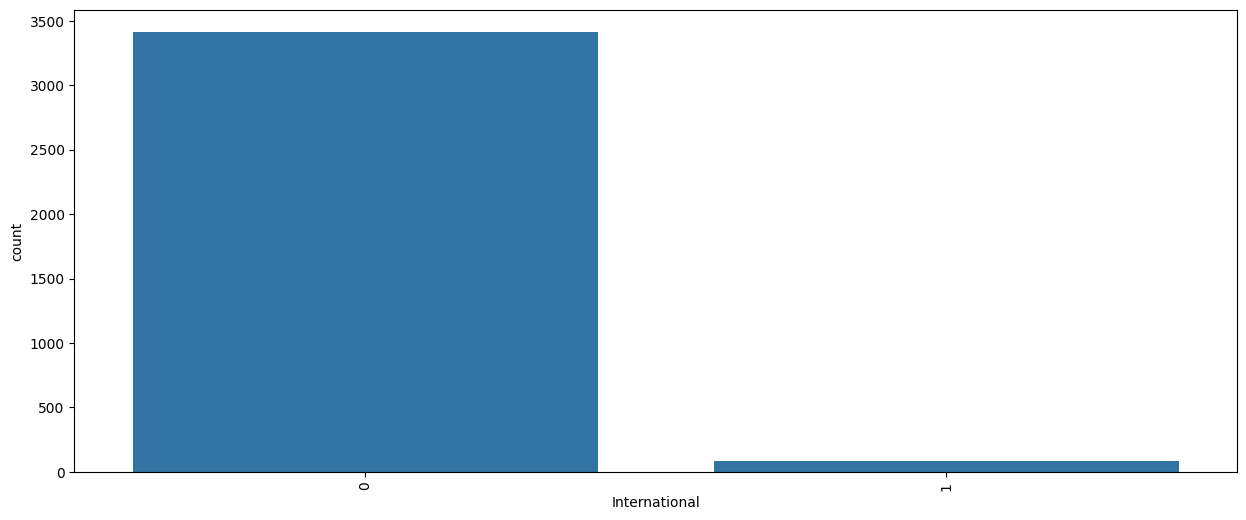

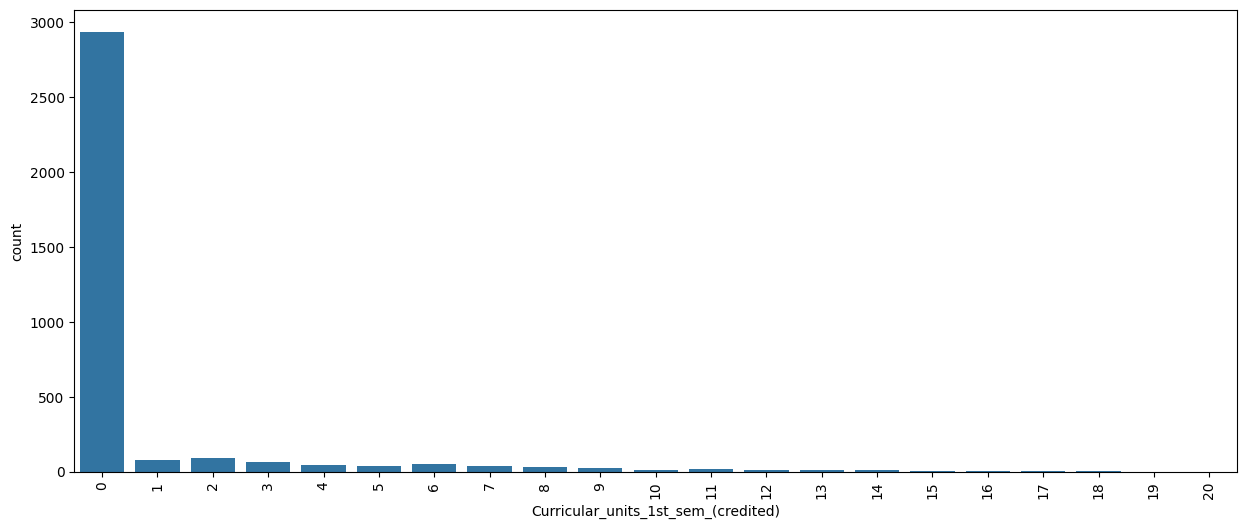

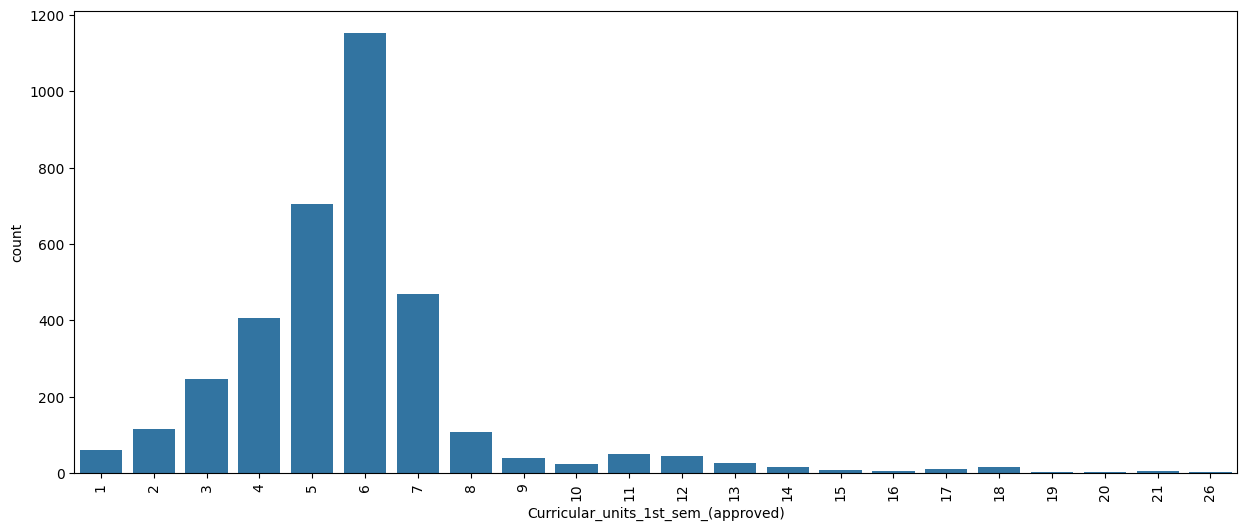

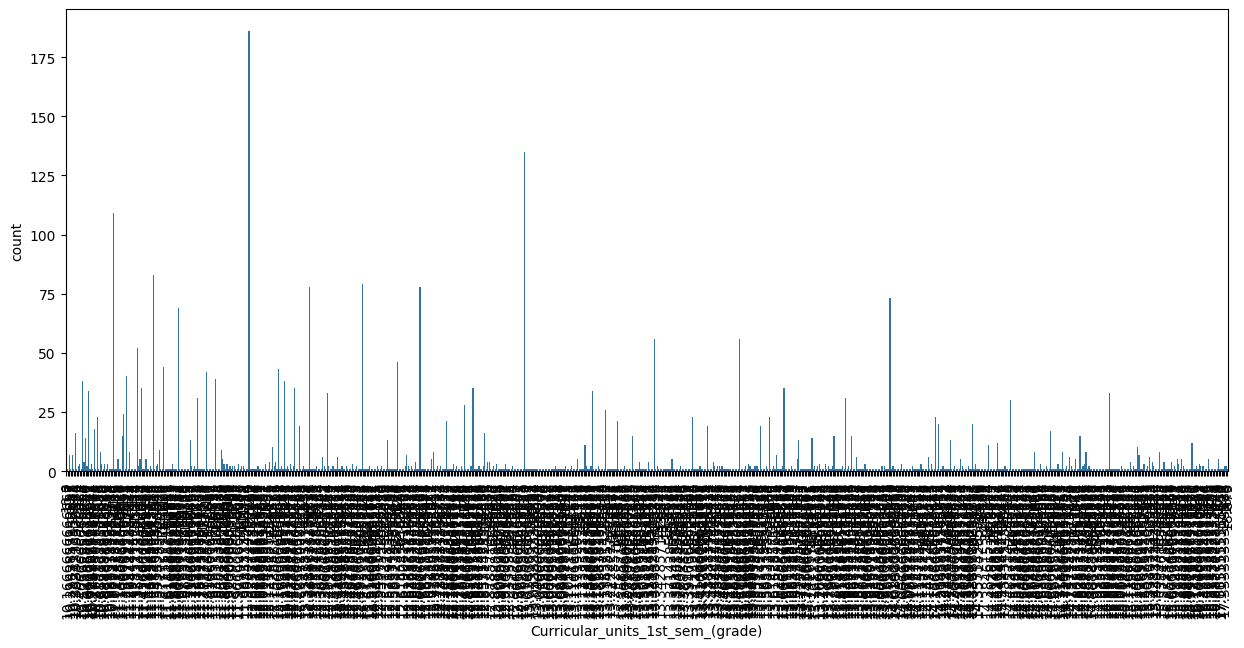

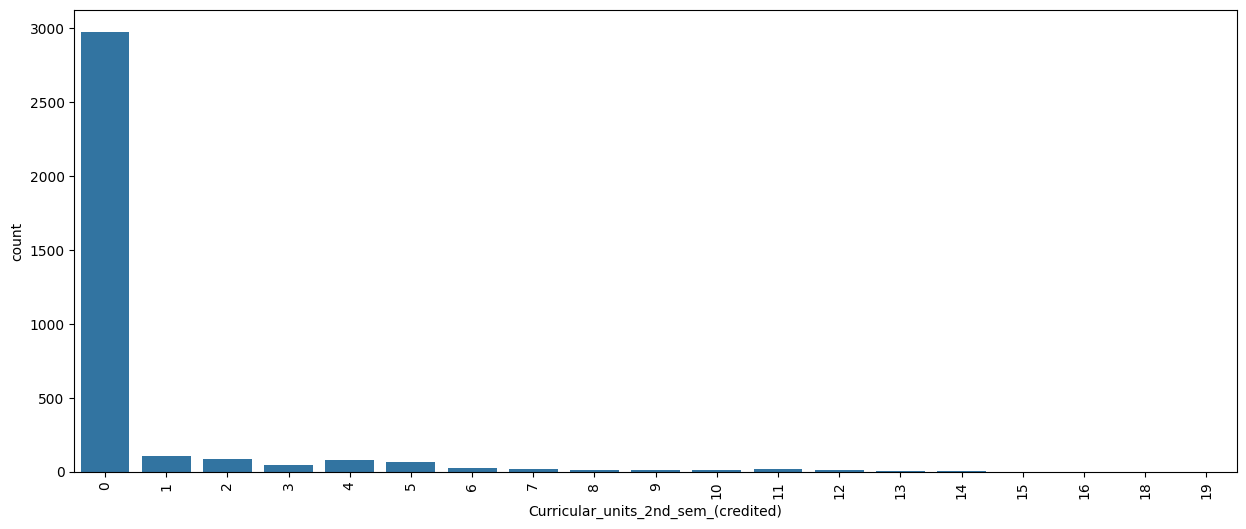

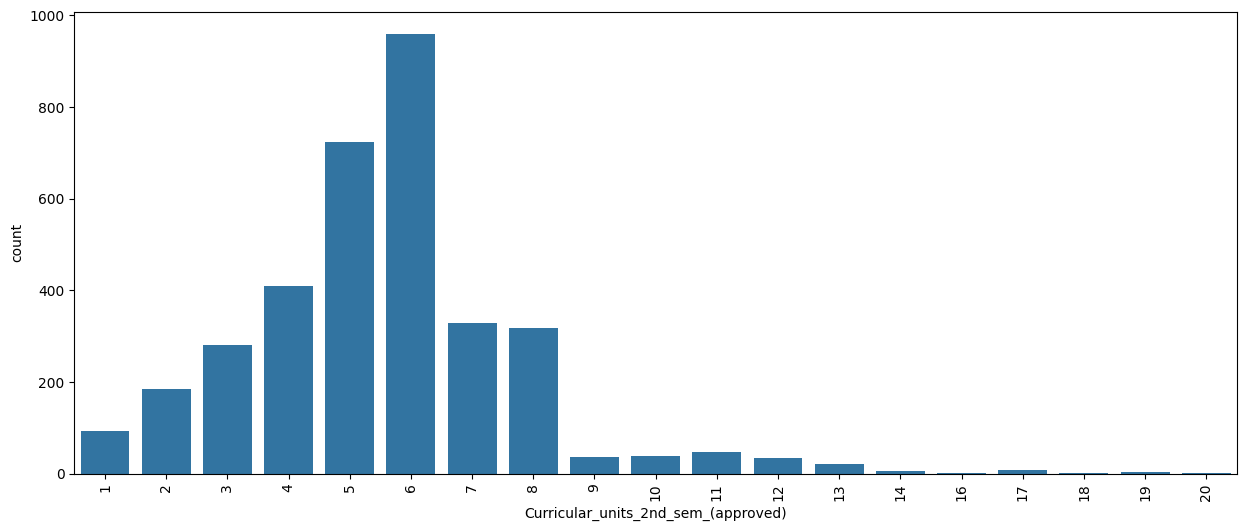

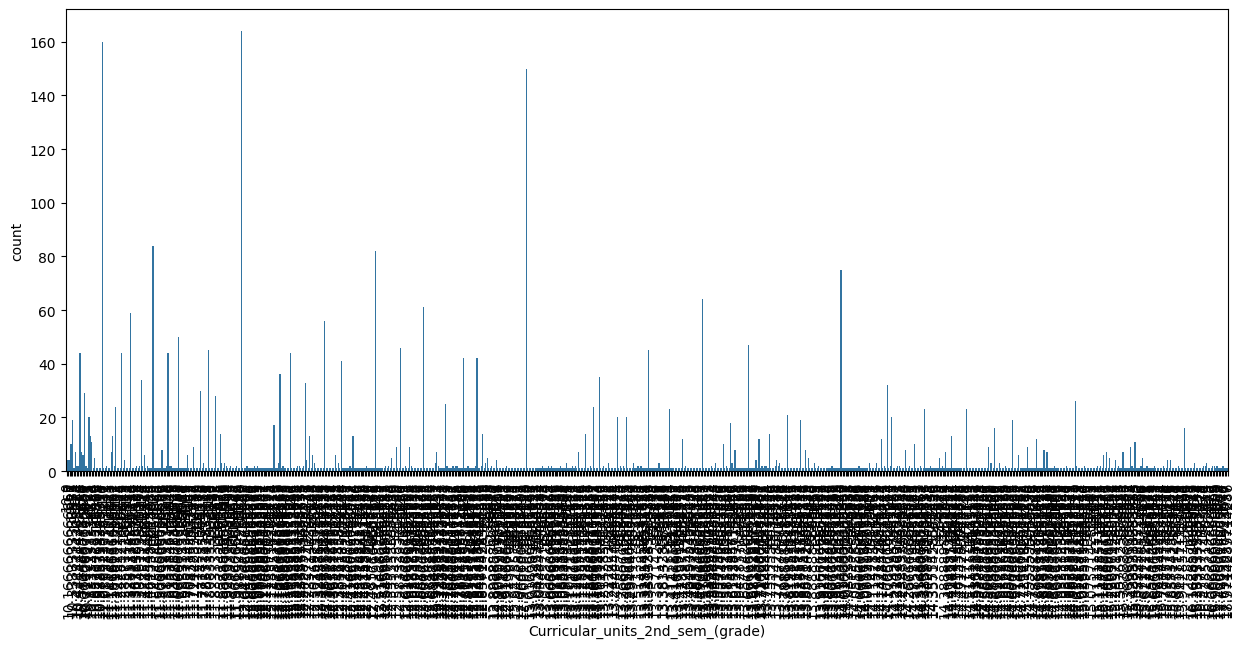

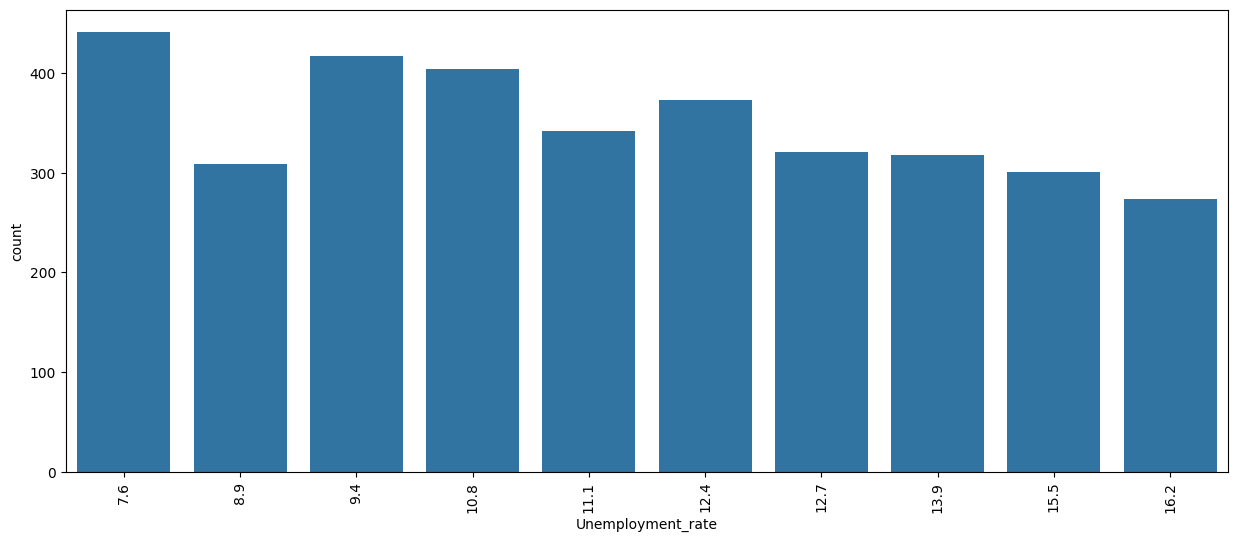

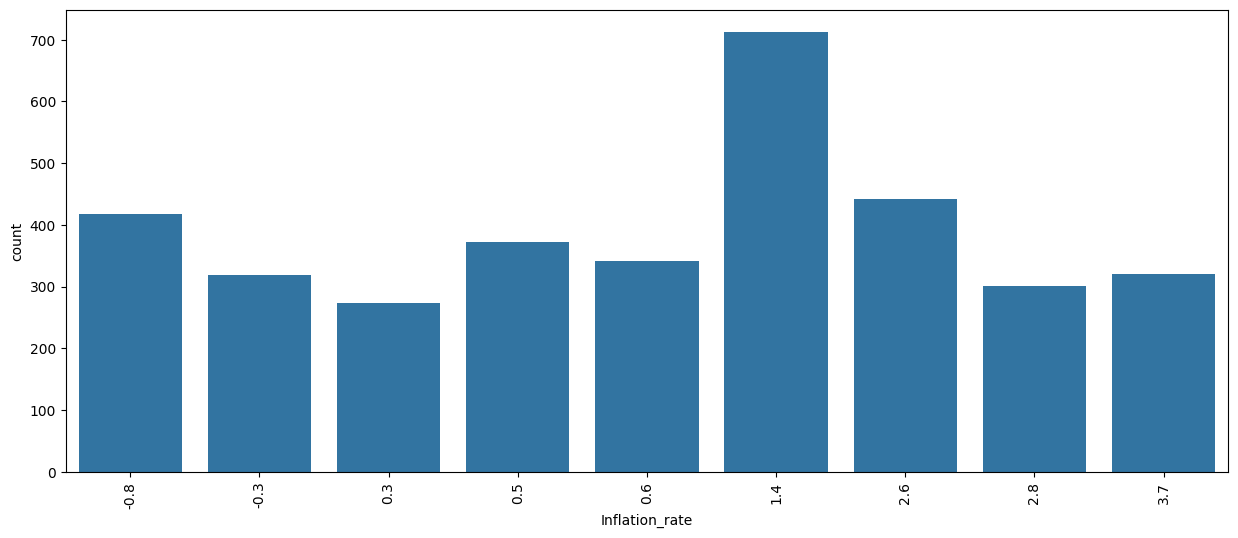

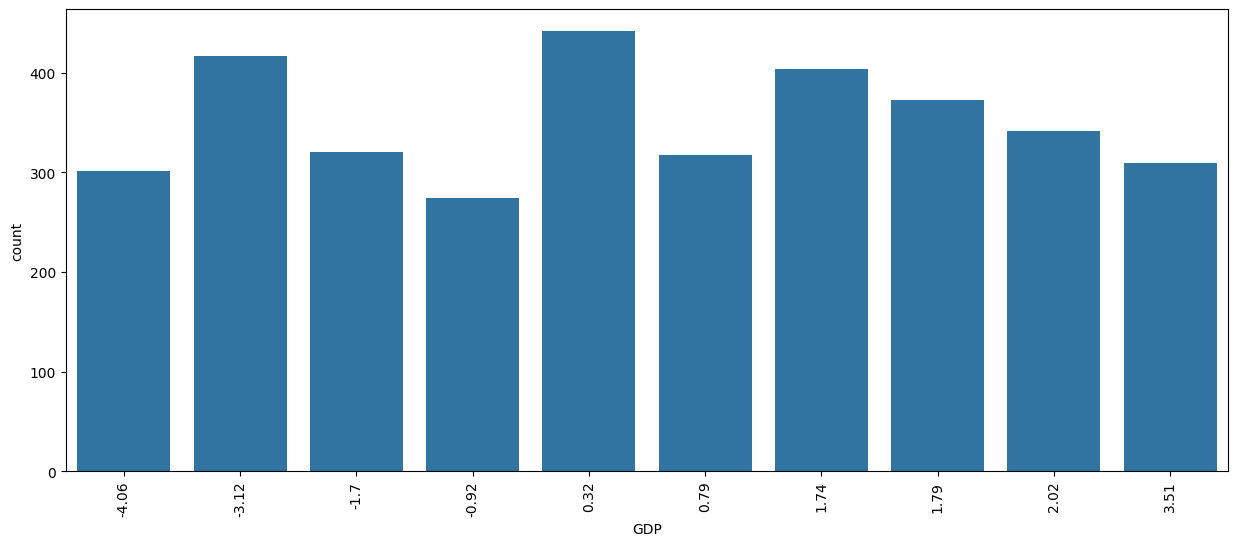

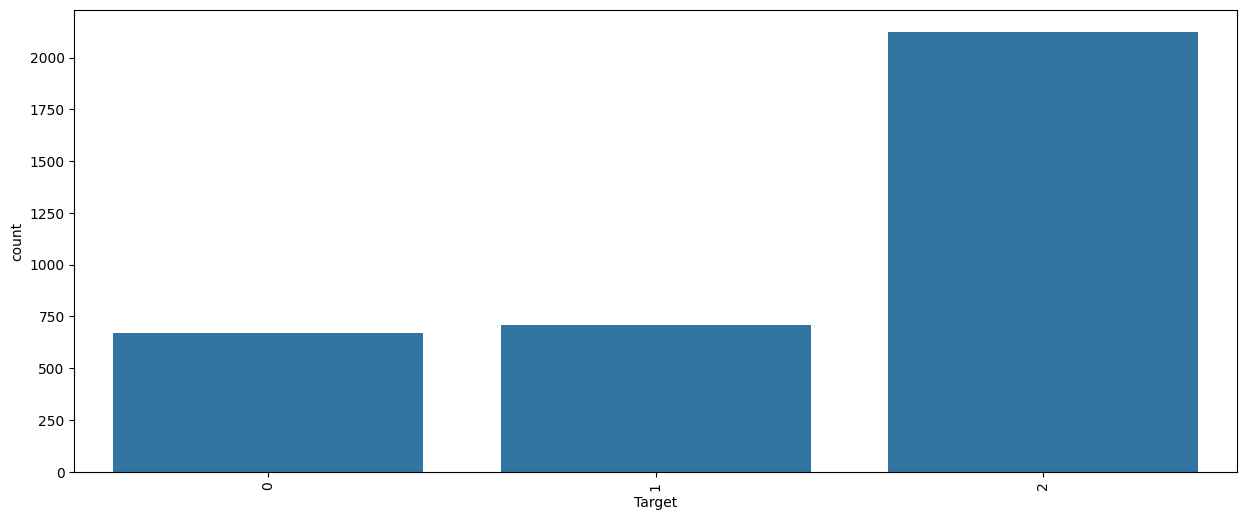

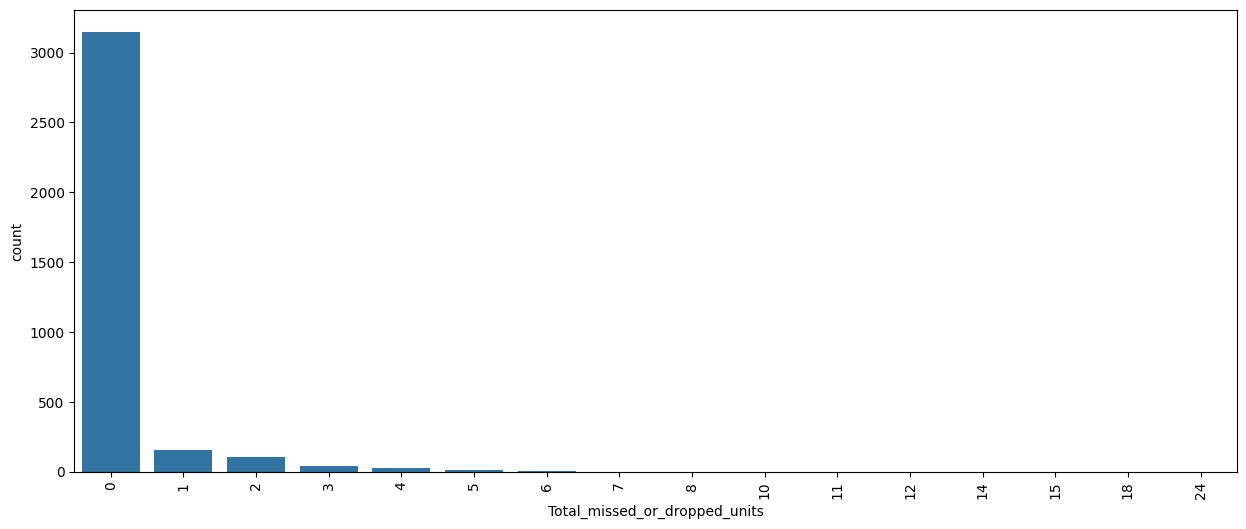

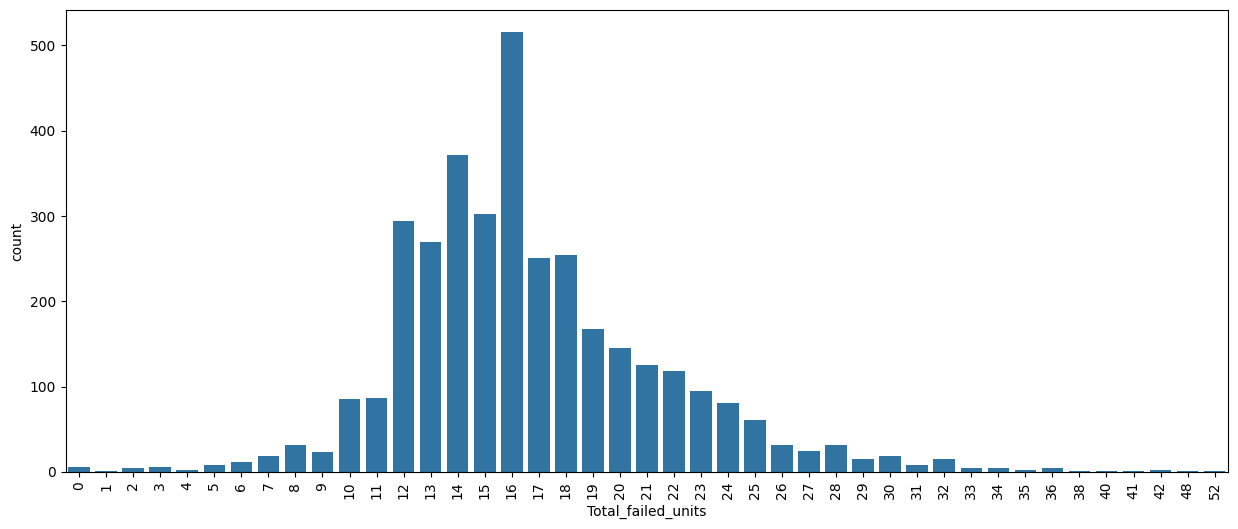

In [ ]:
for columns in df.columns:
  plt.figure(figsize=(15,6))
  sns.countplot(x=columns,data=df)
  plt.xticks(rotation=90)
  plt.show()

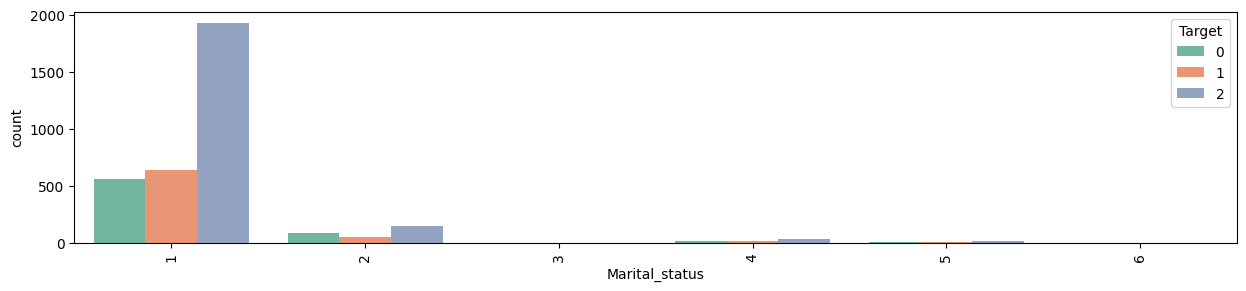

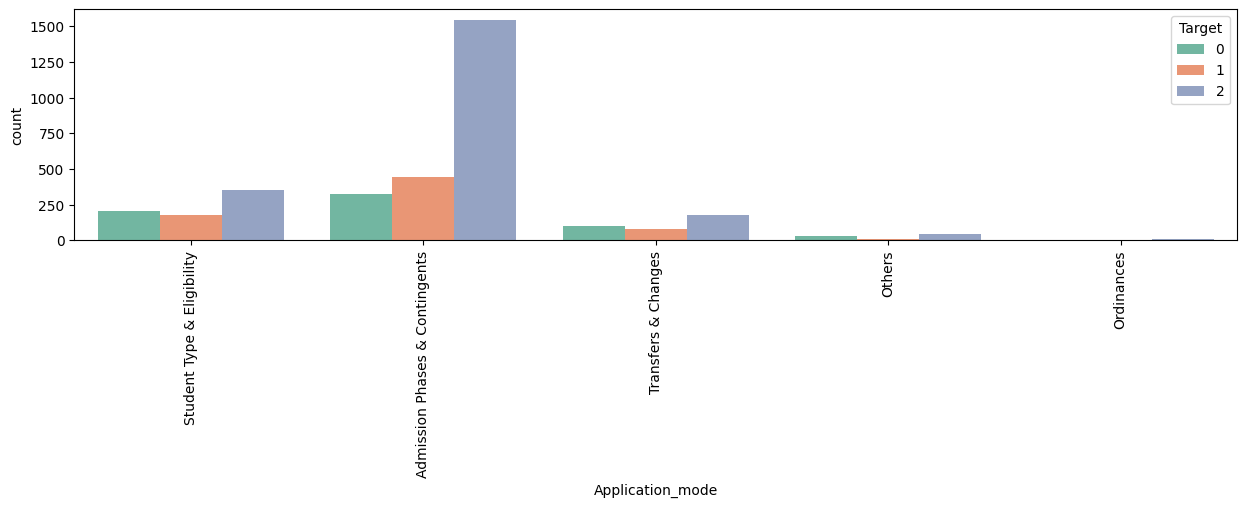

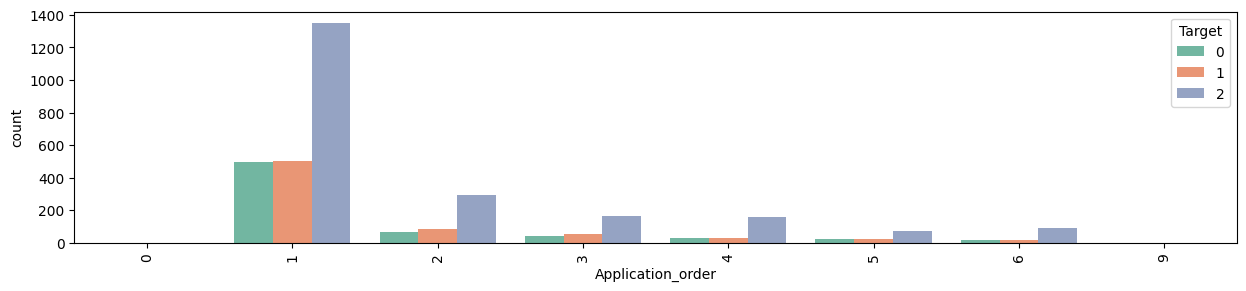

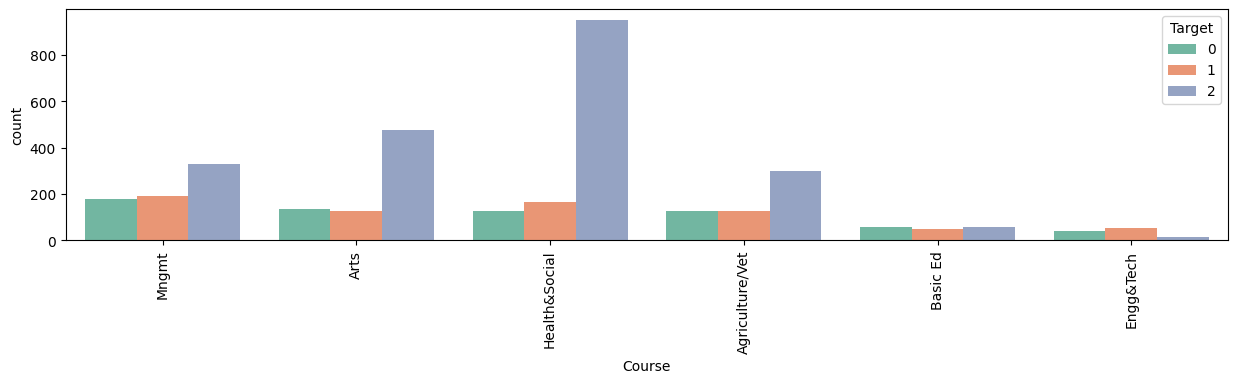

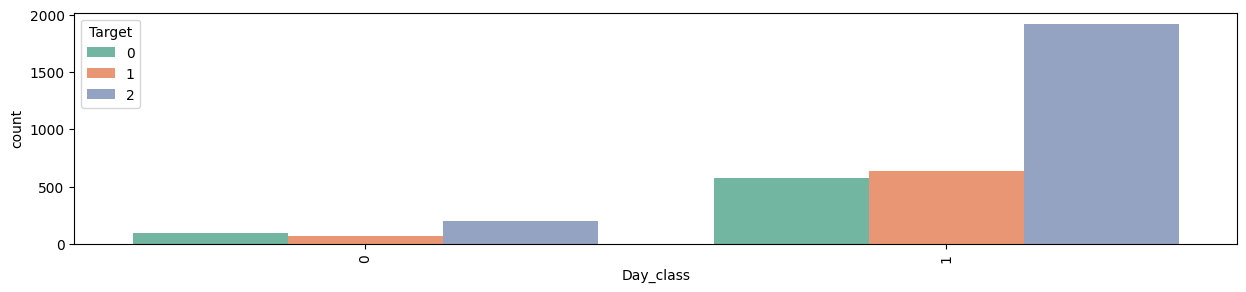

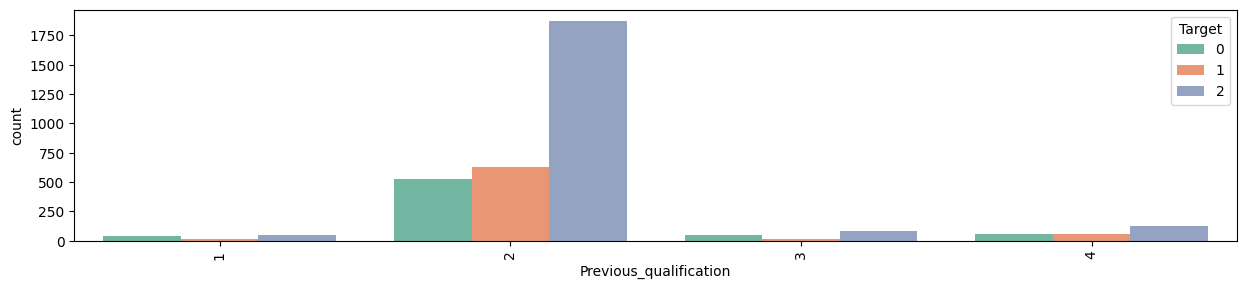

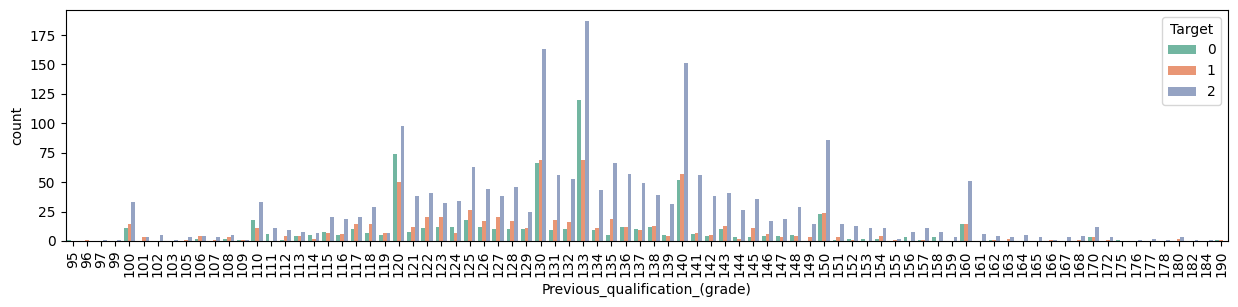

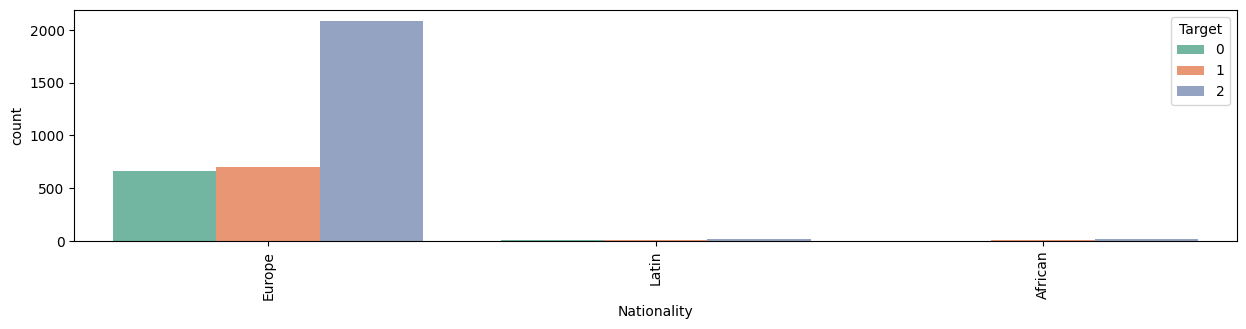

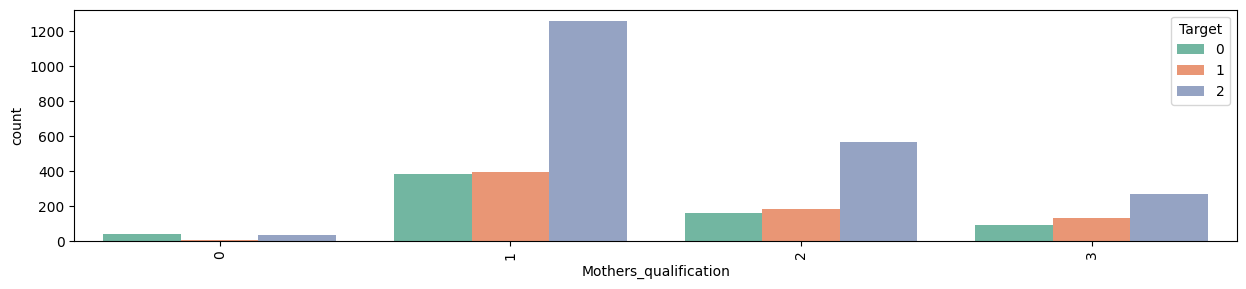

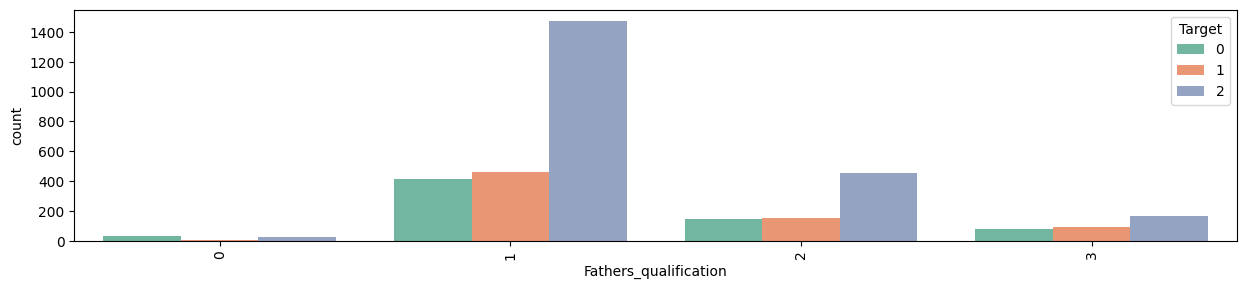

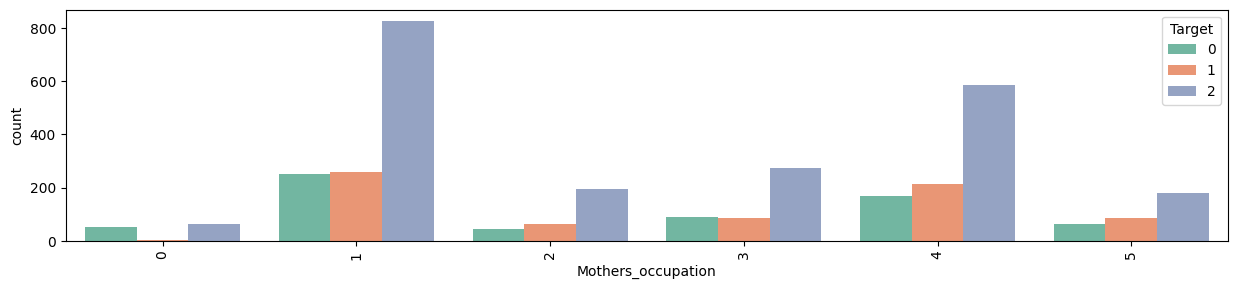

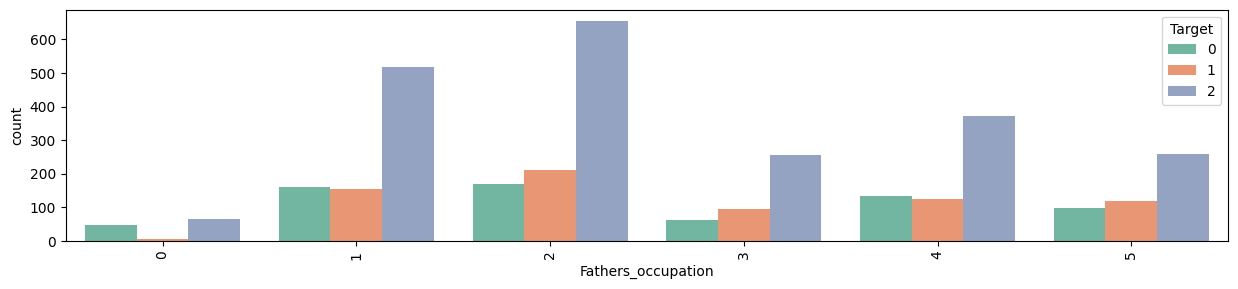

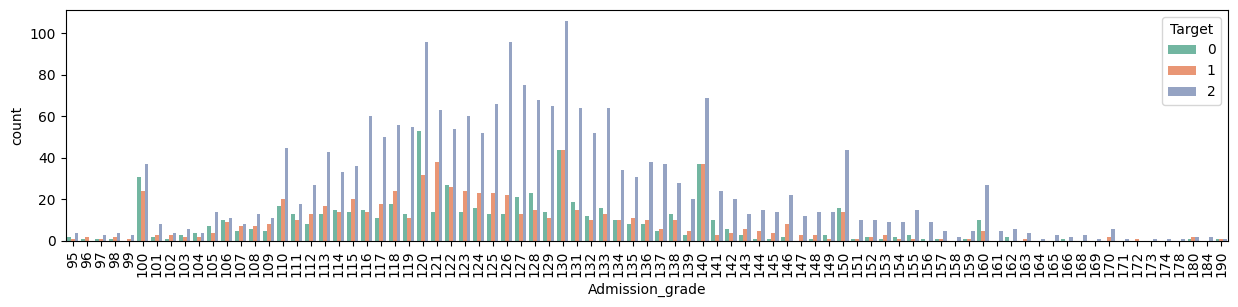

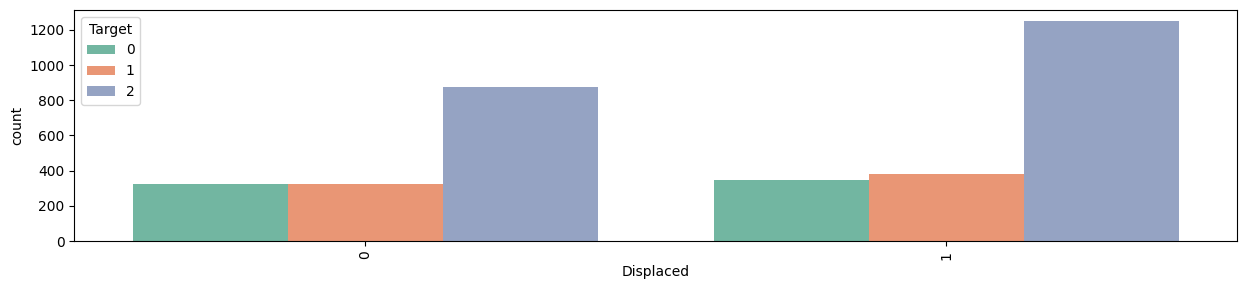

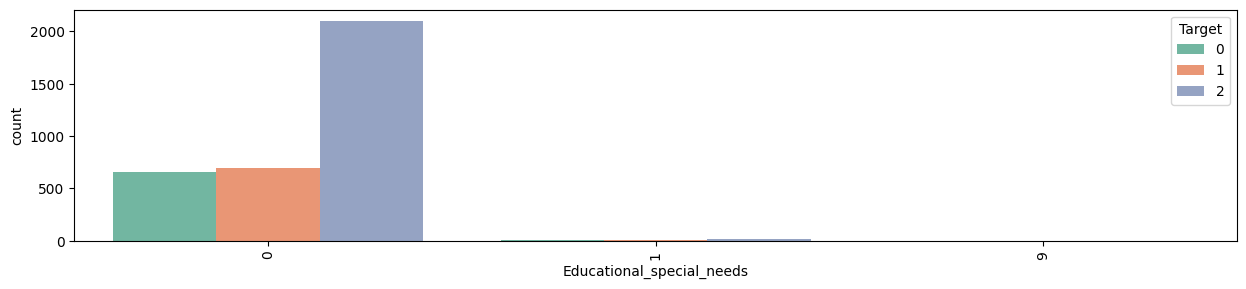

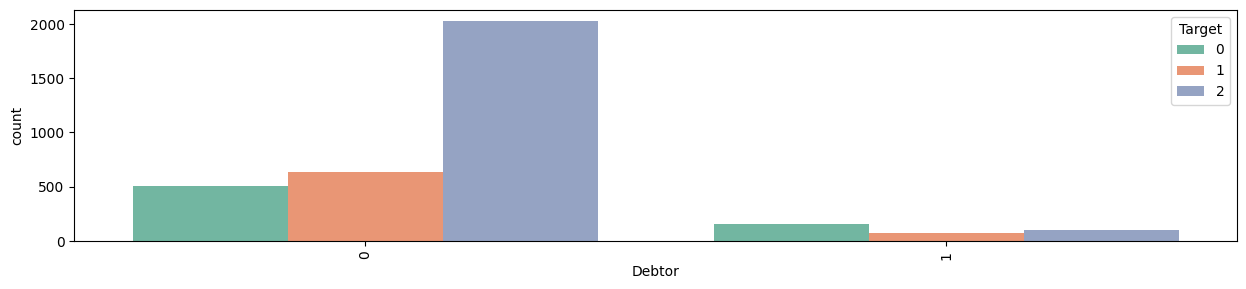

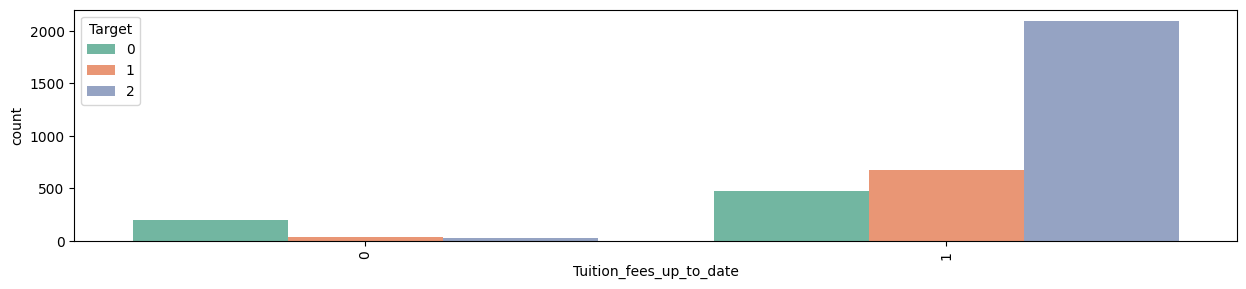

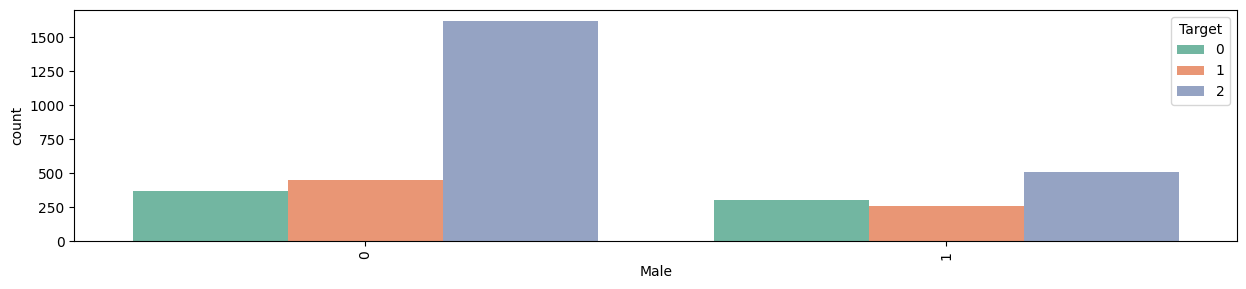

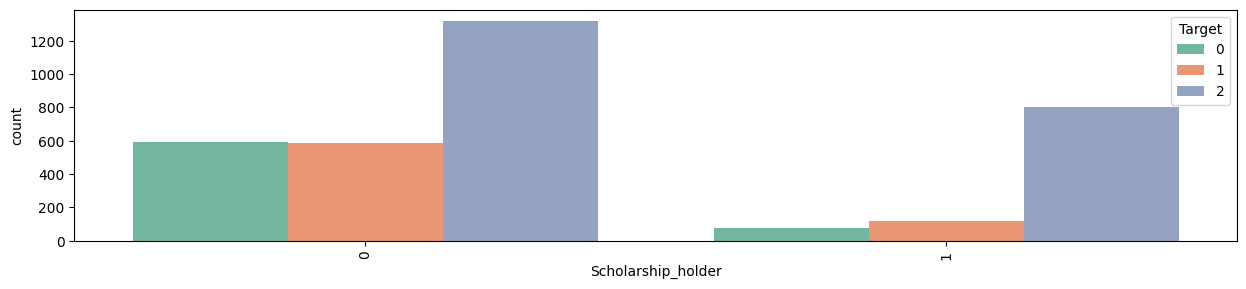

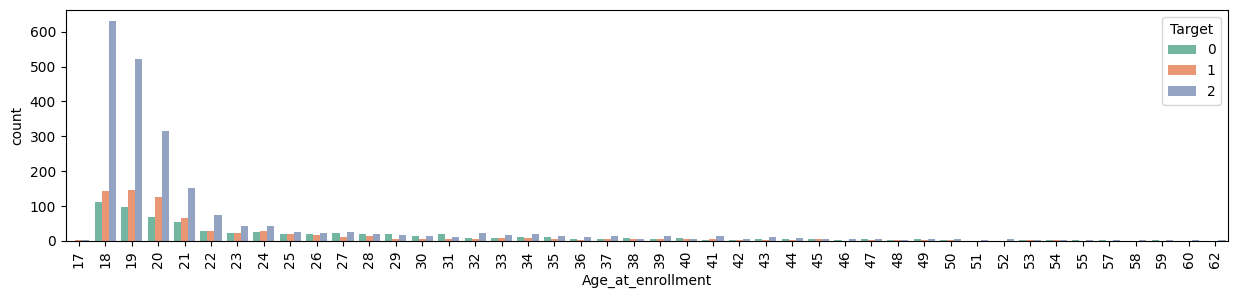

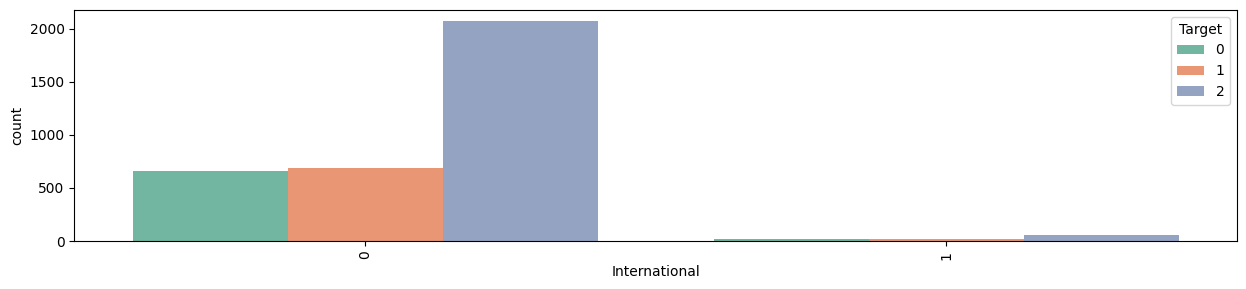

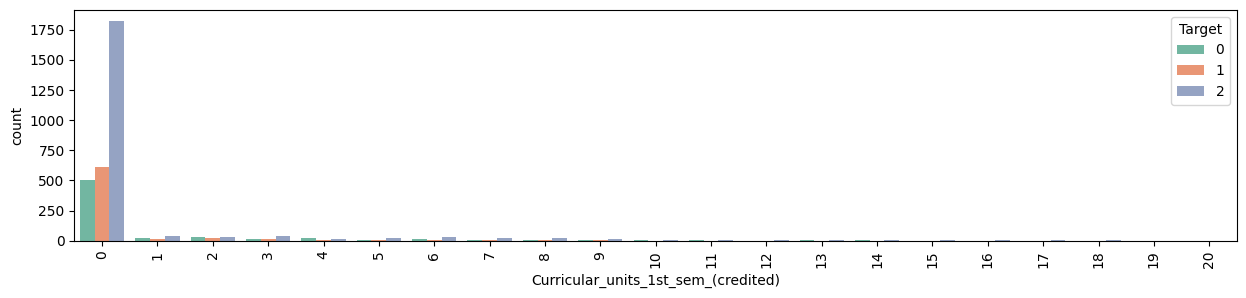

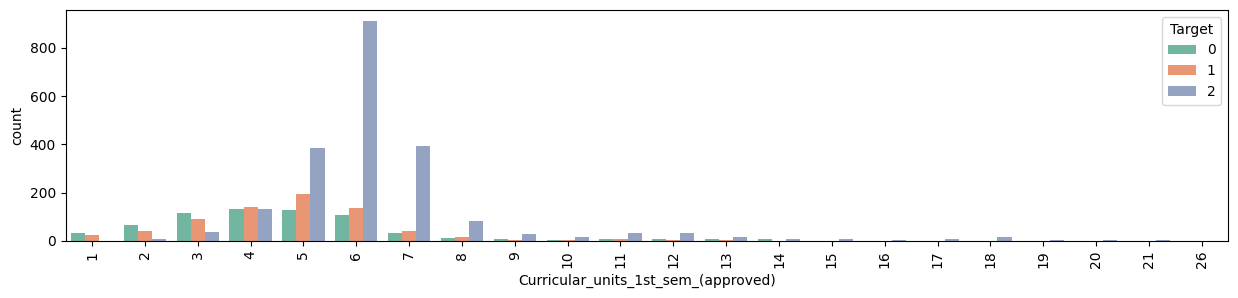

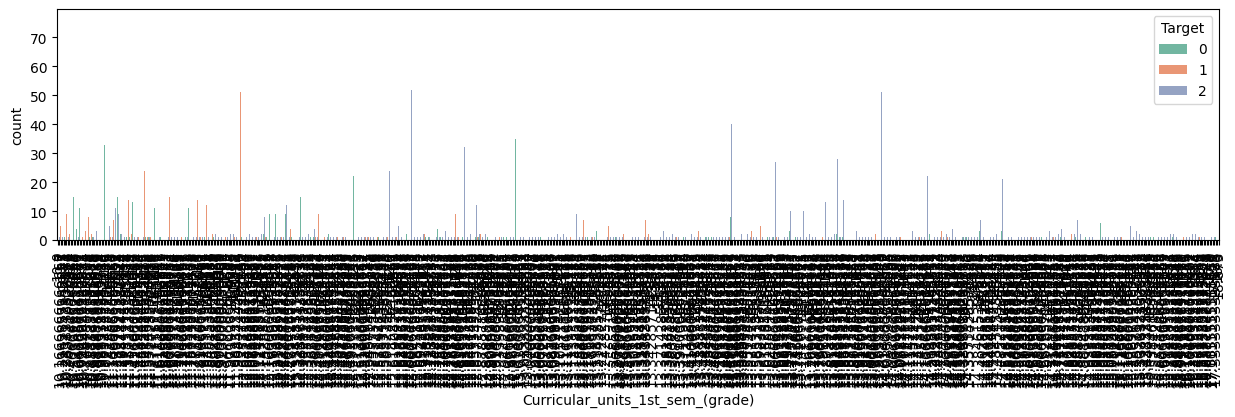

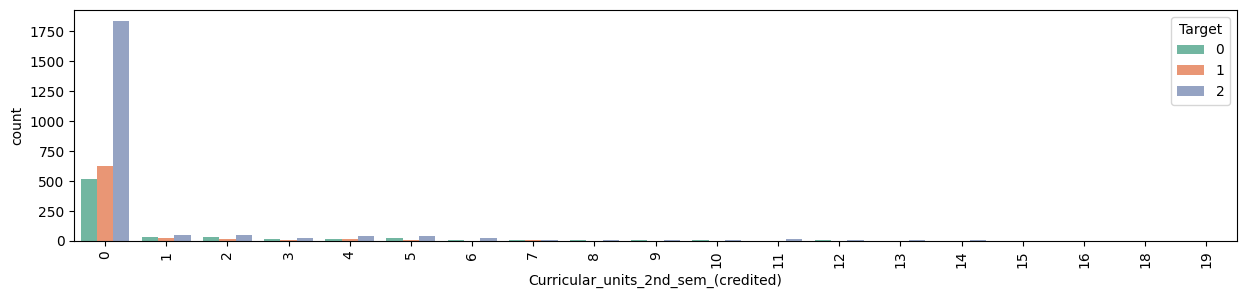

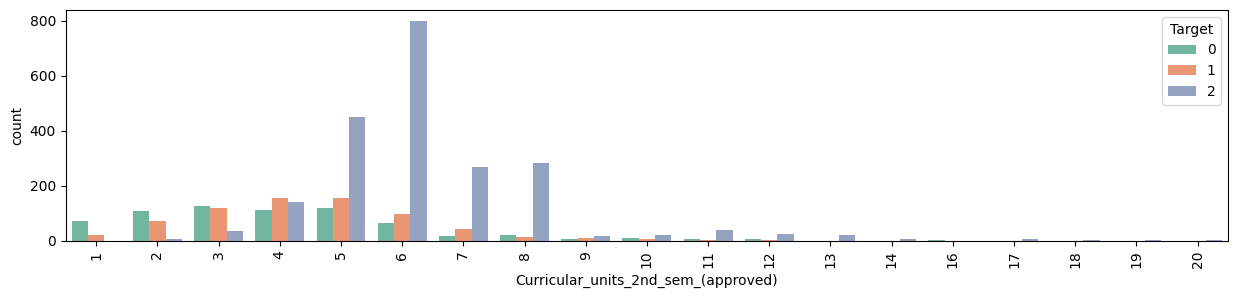

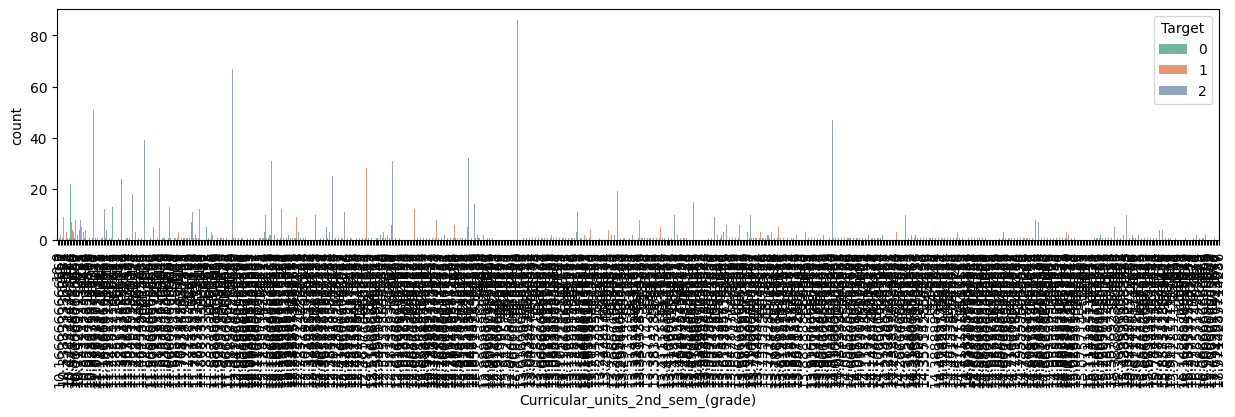

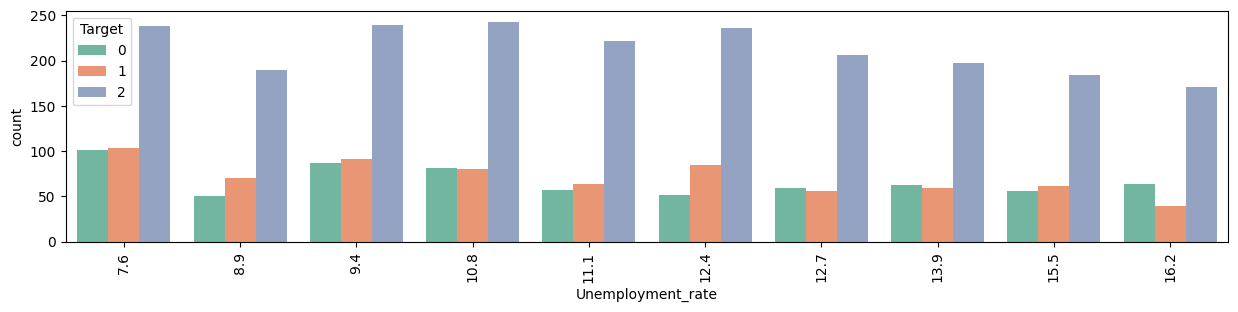

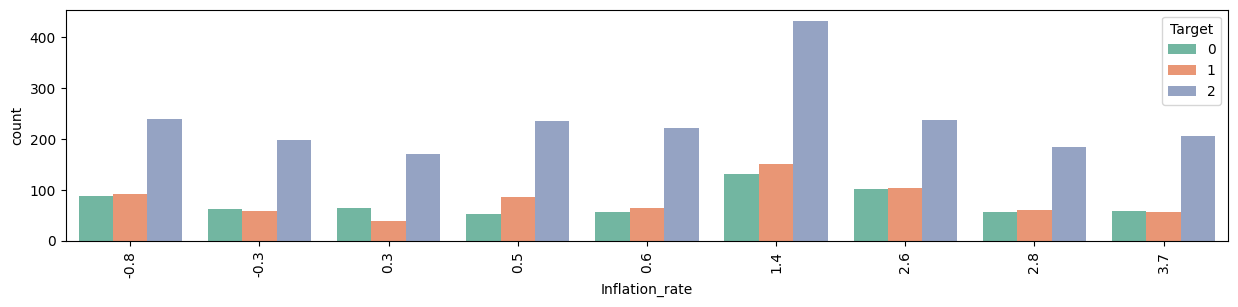

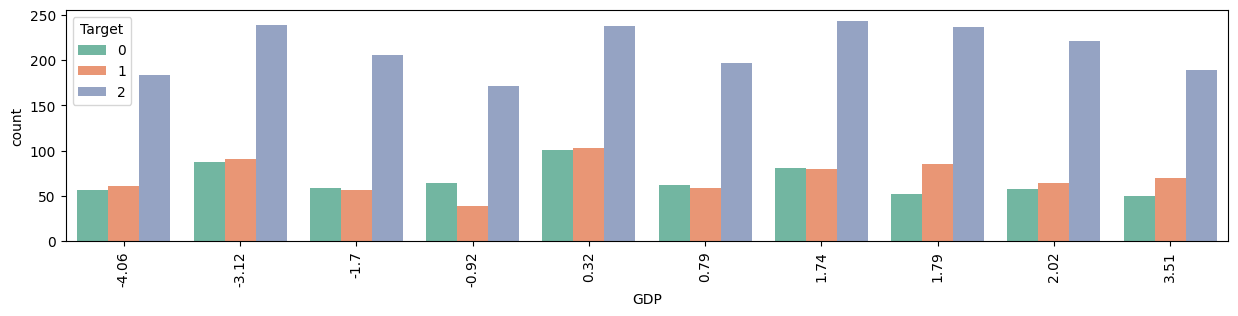

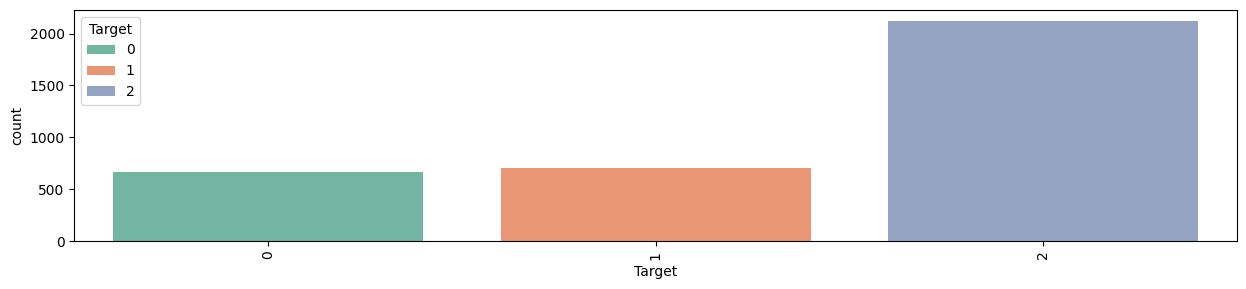

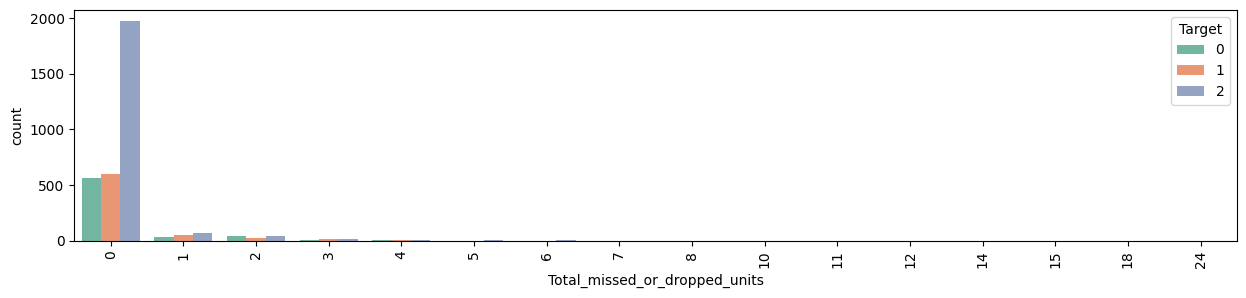

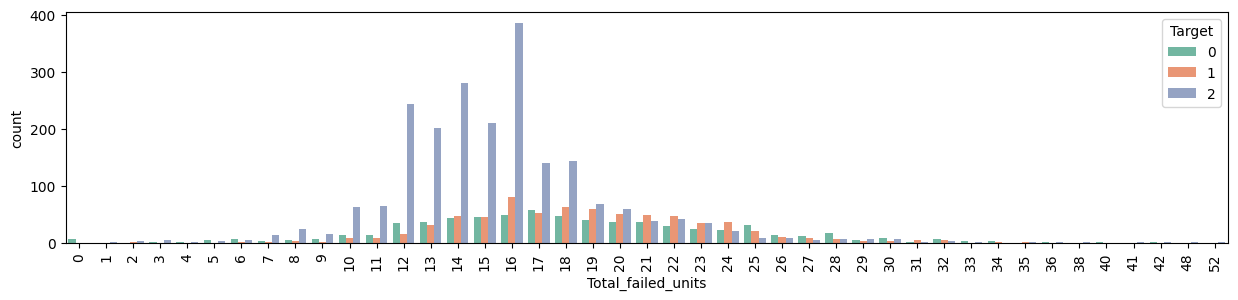

In [ ]:
for columns in df.columns:
  plt.figure(figsize=(15,3))
  sns.countplot(x=columns,data=df,hue='Target',palette='Set2')
  plt.xticks(rotation=90)
  plt.show()

# Chi Square Test

In [ ]:
from sklearn.feature_selection import chi2

x = df.drop(columns=['Target'])
x = x.select_dtypes(include=['number'])
x = x.abs()
y = df['Target']

chi_scores = chi2(x, y)

p_values = pd.Series(chi_scores[1], index=x.columns)
p_values.sort_values(ascending=False, inplace=True)

print(p_values)

Inflation_rate                          6.937388e-01
Previous_qualification                  6.849918e-01
Day_class                               5.671274e-01
International                           5.667987e-01
GDP                                     3.396976e-01
Marital_status                          1.382726e-01
Fathers_qualification                   9.072955e-02
Unemployment_rate                       6.617044e-02
Displaced                               4.898814e-02
Mothers_qualification                   3.770992e-02
Educational_special_needs               1.136839e-02
Fathers_occupation                      4.717522e-03
Mothers_occupation                      6.106320e-04
Application_order                       1.426482e-06
Tuition_fees_up_to_date                 4.026299e-10
Curricular_units_1st_sem_(grade)        4.316953e-12
Previous_qualification_(grade)          1.582090e-13
Admission_grade                         1.734615e-14
Curricular_units_2nd_sem_(grade)        3.0308

In [ ]:
i_cols=[]
significance_level = 0.05
for i in p_values.index:
    if p_values[i] <= significance_level:
        print(i,':- Reject NULL HYPOTHESIS')
    else:
        print(i,':-ACCEPT NULL HYPOTHESIS')
        i_cols.append(i)

Inflation_rate :-ACCEPT NULL HYPOTHESIS
Previous_qualification :-ACCEPT NULL HYPOTHESIS
Day_class :-ACCEPT NULL HYPOTHESIS
International :-ACCEPT NULL HYPOTHESIS
GDP :-ACCEPT NULL HYPOTHESIS
Marital_status :-ACCEPT NULL HYPOTHESIS
Fathers_qualification :-ACCEPT NULL HYPOTHESIS
Unemployment_rate :-ACCEPT NULL HYPOTHESIS
Displaced :- Reject NULL HYPOTHESIS
Mothers_qualification :- Reject NULL HYPOTHESIS
Educational_special_needs :- Reject NULL HYPOTHESIS
Fathers_occupation :- Reject NULL HYPOTHESIS
Mothers_occupation :- Reject NULL HYPOTHESIS
Application_order :- Reject NULL HYPOTHESIS
Tuition_fees_up_to_date :- Reject NULL HYPOTHESIS
Curricular_units_1st_sem_(grade) :- Reject NULL HYPOTHESIS
Previous_qualification_(grade) :- Reject NULL HYPOTHESIS
Admission_grade :- Reject NULL HYPOTHESIS
Curricular_units_2nd_sem_(grade) :- Reject NULL HYPOTHESIS
Total_missed_or_dropped_units :- Reject NULL HYPOTHESIS
Male :- Reject NULL HYPOTHESIS
Curricular_units_2nd_sem_(credited) :- Reject NULL HYPO

In [ ]:
print(i_cols)

['Inflation_rate', 'Previous_qualification', 'Day_class', 'International', 'GDP', 'Marital_status', 'Fathers_qualification', 'Unemployment_rate']


In [ ]:
# Droping the columns which accept the null hypothesis
df.drop(columns=['Inflation_rate', 'Previous_qualification', 'Day_class', 'International', 'GDP', 'Marital_status','Unemployment_rate']
,inplace=True)

In [ ]:
df.columns

Index(['Application_mode', 'Application_order', 'Course',
       'Previous_qualification_(grade)', 'Nationality',
       'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
       'Fathers_occupation', 'Admission_grade', 'Displaced',
       'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
       'Male', 'Scholarship_holder', 'Age_at_enrollment',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd_sem_(grade)', 'Target',
       'Total_missed_or_dropped_units', 'Total_failed_units'],
      dtype='object')

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df.head()

Application_mode  Application_order         Course  \
1      Student Type & Eligibility                  1          Mngmt   
3  Admission Phases & Contingents                  2           Arts   
4      Student Type & Eligibility                  1  Health&Social   
5      Student Type & Eligibility                  1          Mngmt   
6  Admission Phases & Contingents                  1  Health&Social   

   Previous_qualification_(grade) Nationality  Mothers_qualification  \
1                             160      Europe                      2   
3                             122      Europe                      1   
4                             100      Europe                      1   
5                             133      Europe                      1   
6                             142      Europe                      1   

   Fathers_qualification  Mothers_occupation  Fathers_occupation  \
1                      3                   4                   4   
3                      1                   3                   4   
4                      1                   1                   1   
5                      1                   1                   2   
6                      1                   2                   5   

   Admission_grade  ...  Age_at_enrollment  \
1              142  ...                 19   
3              119  ...                 20   
4              141  ...                 45   
5              114  ...                 50   
6              128  ...                 18   

   Curricular_units_1st_sem_(credited)  Curricular_units_1st_sem_(approved)  \
1                                    0                                    6   
3                                    0                                    6   
4                                    0                                    5   
5                                    0                                    5   
6                                    0                                    7   

   Curricular_units_1st_sem_(grade)  Curricular_units_2nd_sem_(credited)  \
1                         14.000000                                    0   
3                         13.428571                                    0   
4                         12.333333                                    0   
5                         11.857143                                    0   
6                         13.300000                                    0   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
1                                    6                         13.666667   
3                                    5                         12.400000   
4                                    6                         13.000000   
5                                    5                         11.500000   
6                                    8                         14.345000   

   Target  Total_missed_or_dropped_units  Total_failed_units  
1       2                              0                  12  
3       2                              0                  18  
4       2                              0                  15  
5       2                              5                  27  
6       2                              0                  17  

[5 rows x 26 columns]

In [ ]:
df.shape

(3501, 26)

In [ ]:
x = df.drop(columns=['Target'])
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# LDA

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,2,4])
],remainder='passthrough')

In [ ]:
step2 = LDA(solver='lsqr')

pipe_lda = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_lda.fit(x_train,y_train)

pred_lda = pipe_lda.predict(x_test)

lda_train_acc = pipe_lda.score(x_train, y_train)
lda_test_acc = pipe_lda.score(x_test, y_test)

print("LDA Training Accuracy:", lda_train_acc)
print("LDA Test Accuracy:", lda_test_acc)

lda_f1_score = f1_score(y_test, pred_lda, average='weighted')
print("LDA F1 Score:", lda_f1_score)

lda_classification_report = classification_report(y_test, pred_lda)
print("LDA Classification Report:\n", lda_classification_report)

LDA Training Accuracy: 0.7460714285714286
LDA Test Accuracy: 0.7432239657631954
LDA F1 Score: 0.72951617584999
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.48      0.56       126
           1       0.55      0.48      0.51       162
           2       0.81      0.93      0.87       413

    accuracy                           0.74       701
   macro avg       0.68      0.63      0.65       701
weighted avg       0.73      0.74      0.73       701



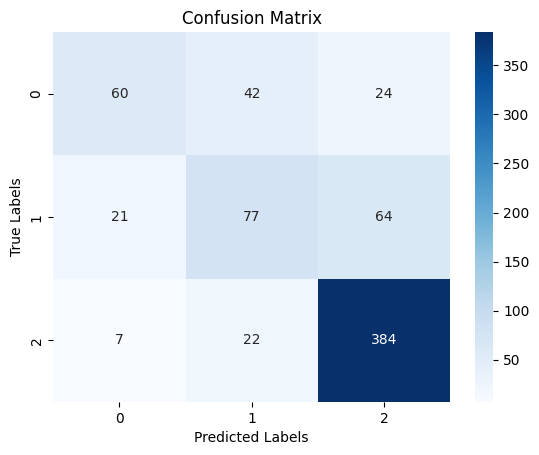

In [ ]:
lda_cm = confusion_matrix(y_test, pred_lda)

sns.heatmap(lda_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Logistic Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,2,4])
],remainder='passthrough')

step2 = LogisticRegression(max_iter=1000)

pipe_lr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_lr.fit(x_train,y_train)

pred_lr = pipe_lr.predict(x_test)

lr_train_acc = accuracy_score(y_train, pipe_lr.predict(x_train))
lr_test_acc = accuracy_score(y_test, pipe_lr.predict(x_test))

print("Logistic Regression Training Accuracy:", lr_train_acc)
print("Logistic Regression Test Accuracy:", lr_test_acc)

lr_f1_score = f1_score(y_test, pred_lr, average='weighted')
print("Logistic Regression F1 Score:", lr_f1_score)

lr_classification_report = classification_report(y_test, pred_lr)
print("Logistic Regression Classification Report:\n", lr_classification_report)

Logistic Regression Training Accuracy: 0.7503571428571428
Logistic Regression Test Accuracy: 0.7532097004279601
Logistic Regression F1 Score: 0.7380979285312398
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.58      0.62       126
           1       0.57      0.42      0.48       162
           2       0.82      0.94      0.87       413

    accuracy                           0.75       701
   macro avg       0.69      0.65      0.66       701
weighted avg       0.73      0.75      0.74       701



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


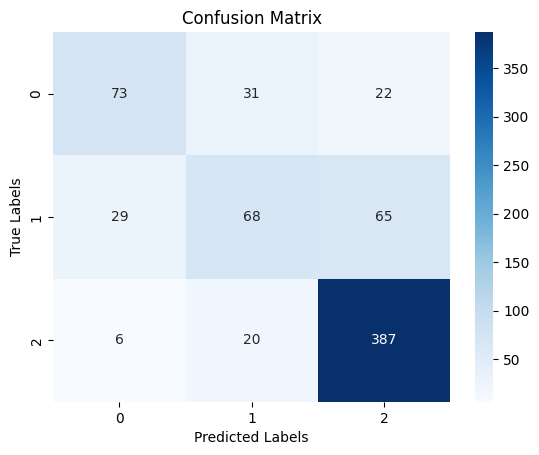

In [ ]:
lr_cm = confusion_matrix(y_test, pred_lr)

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
klis = []
l1 = []
l2 = []
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,2,4])
],remainder='passthrough')
for k in range(1,20,2):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  pipe_knn = Pipeline([
    ('step1',step1),
    ('step2',knn_model)
  ])
  pipe_knn.fit(x_train,y_train)

  #print(f"K value is  : {k}")

  pred_knn = pipe_knn.predict(x_test)

  knn_train_acc = accuracy_score(y_train, pipe_knn.predict(x_train))
  knn_test_acc = accuracy_score(y_test, pipe_knn.predict(x_test))

  klis.append(k)
  l1.append(knn_test_acc)
  l2.append(knn_train_acc)


print(klis[l1.index(max(l1))])
print()



19



In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,2,4])
],remainder='passthrough')

knn_model = KNeighborsClassifier(n_neighbors=klis[l1.index(max(l1))])

pipe_bestknn = Pipeline([
    ('step1',step1),
    ('step2',knn_model)
])

pipe_bestknn.fit(x_train,y_train)

pred_knn = pipe_bestknn.predict(x_test)

knn_train_acc = accuracy_score(y_train, pipe_bestknn.predict(x_train))

knn_test_acc = accuracy_score(y_test, pipe_bestknn.predict(x_test))

print("KNN Training Accuracy:", knn_train_acc)
print("KNN Test Accuracy:", knn_test_acc)

knn_f1_score = f1_score(y_test, pred_knn, average='weighted')
print("KNN F1 Score:", knn_f1_score)

knn_classification_report = classification_report(y_test, pred_knn)
print("KNN Classification Report:\n", knn_classification_report)

KNN Training Accuracy: 0.6953571428571429
KNN Test Accuracy: 0.6604850213980028
KNN F1 Score: 0.6092446025581286
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.25      0.34       126
           1       0.48      0.24      0.32       162
           2       0.70      0.95      0.80       413

    accuracy                           0.66       701
   macro avg       0.58      0.48      0.49       701
weighted avg       0.62      0.66      0.61       701



# Descion Tree

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,2,4])
],remainder='passthrough')

dt_model = DecisionTreeClassifier(criterion='gini')

pipe_dt = Pipeline([
    ('step1',step1),
    ('step2',dt_model)
])

pipe_dt.fit(x_train,y_train)

pred_dt = pipe_dt.predict(x_test)

dt_train_acc = accuracy_score(y_train, pipe_dt.predict(x_train))
dt_test_acc = accuracy_score(y_test, pipe_dt.predict(x_test))

print("Decision Tree Training Accuracy:", dt_train_acc)
print("Decision Tree Test Accuracy:", dt_test_acc)

dt_f1_score = f1_score(y_test, pred_dt, average='weighted')
print("Decision Tree F1 Score:", dt_f1_score)

dt_classification_report = classification_report(y_test, pred_dt)
print("Decision Tree Classification Report:\n", dt_classification_report)


Decision Tree Training Accuracy: 1.0
Decision Tree Test Accuracy: 0.6119828815977175
Decision Tree F1 Score: 0.6183236242548462
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.42      0.38       126
           1       0.41      0.40      0.40       162
           2       0.80      0.76      0.78       413

    accuracy                           0.61       701
   macro avg       0.52      0.52      0.52       701
weighted avg       0.63      0.61      0.62       701



Text(50.722222222222214, 0.5, 'True Labels')

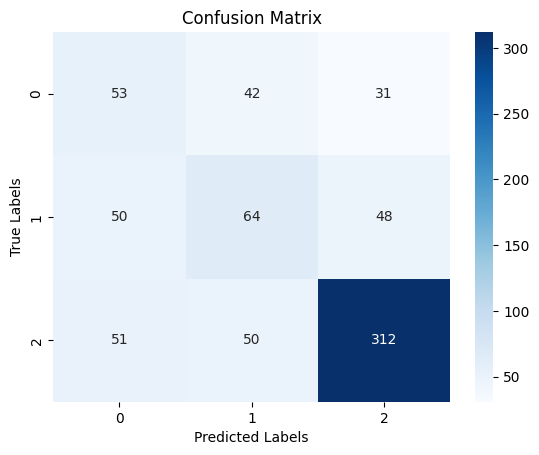

In [ ]:
dt_cm = confusion_matrix(y_test, pred_dt)

sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Pruning

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,2,4])
],remainder='passthrough')

dt_model = DecisionTreeClassifier(criterion='gini')

pipe_dt = Pipeline([
    ('step1',step1),
    ('step2',dt_model)
])

pipe_dt.fit(x_train,y_train)

subtress = pipe_dt.named_steps['step2'].cost_complexity_pruning_path(pipe_dt.named_steps['step1'].transform(x_train), y_train)
cpp_alphas, impurities = subtress.ccp_alphas, subtress.impurities
print(cpp_alphas)

[0.         0.00023109 0.00023191 0.00023357 0.00023369 0.00023648
 0.00026516 0.00027575 0.00028571 0.00028571 0.00030612 0.0003125
 0.00031746 0.00031746 0.00032381 0.00032468 0.00032738 0.00032738
 0.00032771 0.00032967 0.00033163 0.00033279 0.00033279 0.00033613
 0.00033631 0.0003373  0.0003373  0.00033762 0.00033929 0.00034014
 0.00034014 0.00034091 0.00034161 0.00034164 0.00034392 0.00034483
 0.00034632 0.00034787 0.00034884 0.00035    0.00035009 0.00035165
 0.00035378 0.00035714 0.00035714 0.00035714 0.00035714 0.00035714
 0.00035714 0.00035714 0.00035714 0.00035714 0.00035714 0.00035714
 0.00035714 0.00035714 0.00035714 0.00035714 0.00035714 0.00035714
 0.00035714 0.00035714 0.00035714 0.00035714 0.00035714 0.00035714
 0.00035714 0.00035714 0.00035714 0.00035714 0.00035714 0.00035714
 0.00040816 0.00041315 0.00042857 0.00042857 0.00042857 0.00043651
 0.00043717 0.0004381  0.00043831 0.00044048 0.00044163 0.00045614
 0.00047619 0.00047619 0.00047619 0.00047619 0.00047619 0.00047

In [ ]:
train_acc_list = []
test_acc_list = []

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,2,4])
],remainder='passthrough')


for cpp_alpha in cpp_alphas:
  best_dt = DecisionTreeClassifier(ccp_alpha=cpp_alpha)
  pipe_dt = Pipeline([
    ('step1',step1),
    ('step2',best_dt)
  ])
  pipe_dt.fit(x_train, y_train)
  pipe_dt.set_params(step2__ccp_alpha= cpp_alpha)
  pipe_dt.fit(x_train, y_train)
  train_pred = pipe_dt.predict(x_train)
  test_pred = pipe_dt.predict(x_test)
  train_acc = accuracy_score(y_train, train_pred)
  test_acc = accuracy_score(y_test, test_pred)
  train_acc_list.append(train_acc)
  test_acc_list.append(test_acc)



In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,2,4])
],remainder='passthrough')

best_dt = DecisionTreeClassifier(ccp_alpha=cpp_alphas[test_acc_list.index(max(test_acc_list))])
pipe_dt = Pipeline([
    ('step1',step1),
    ('step2',best_dt)
])

pipe_dt.fit(x_train, y_train)
print(best_dt.tree_.n_leaves)

preds = pipe_dt.predict(x_test)
best_dt_train_acc = accuracy_score(y_train, pipe_dt.predict(x_train))
best_dt_test_acc = accuracy_score(y_test, preds)

print("Best Decision Tree Training Accuracy:", best_dt_train_acc)
print("Best Decision Tree Test Accuracy:", best_dt_test_acc)

best_dt_f1_score = f1_score(y_test, preds, average='weighted')
print("Best Decision Tree F1 Score:", best_dt_f1_score)

best_dt_classification_report = classification_report(y_test, preds)
print("Best Decision Tree Classification Report:\n", best_dt_classification_report)

51
Best Decision Tree Training Accuracy: 0.7839285714285714
Best Decision Tree Test Accuracy: 0.7004279600570613
Best Decision Tree F1 Score: 0.6854416998889048
Best Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.44      0.52       126
           1       0.49      0.42      0.45       162
           2       0.77      0.89      0.83       413

    accuracy                           0.70       701
   macro avg       0.63      0.58      0.60       701
weighted avg       0.68      0.70      0.69       701



Text(50.722222222222214, 0.5, 'True Labels')

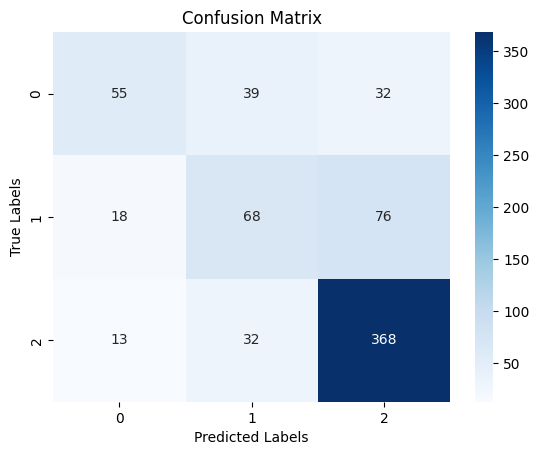

In [ ]:
best_dt_cm = confusion_matrix(y_test, preds)

sns.heatmap(best_dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Comparison

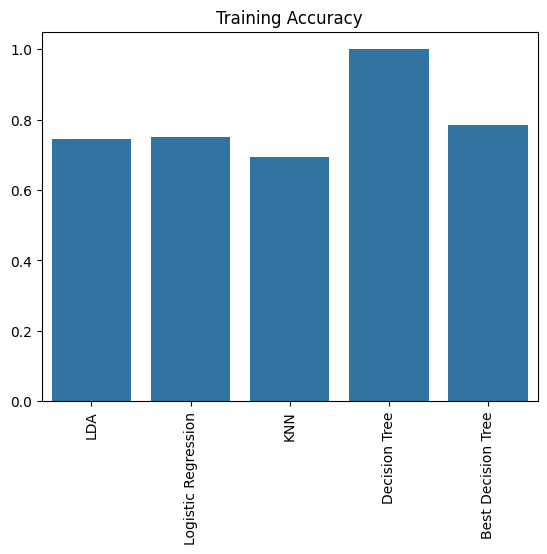

In [ ]:
acc_list = [lda_train_acc, lr_train_acc, knn_train_acc, dt_train_acc, best_dt_train_acc]
test_acc_list = [lda_test_acc, lr_test_acc, knn_test_acc,dt_test_acc, best_dt_test_acc]

sns.barplot(x=['LDA', 'Logistic Regression', 'KNN', 'Decision Tree', 'Best Decision Tree'], y=acc_list)
plt.xticks(rotation=90)
plt.title("Training Accuracy")

plt.show()

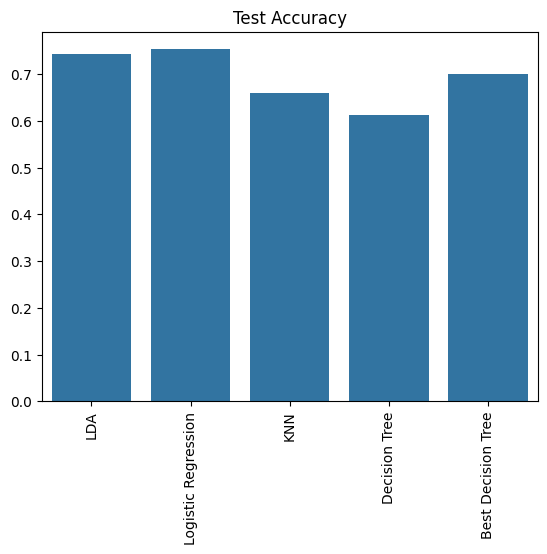

In [ ]:
sns.barplot(x=['LDA', 'Logistic Regression', 'KNN', 'Decision Tree', 'Best Decision Tree'], y=test_acc_list)
plt.xticks(rotation=90)
plt.title("Test Accuracy")
plt.show()

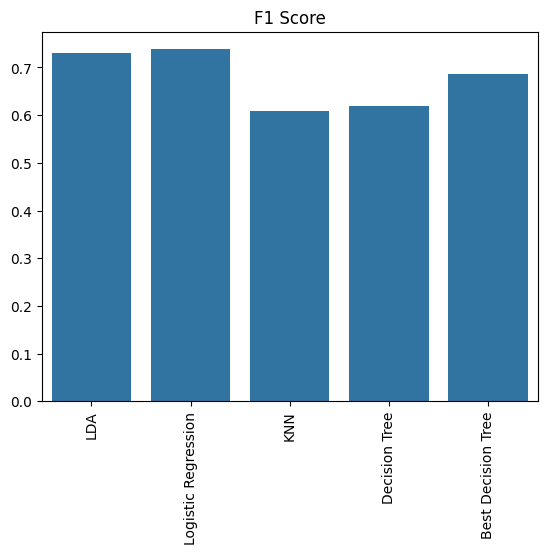

In [ ]:
f1_lst = [lda_f1_score, lr_f1_score, knn_f1_score, dt_f1_score, best_dt_f1_score]

sns.barplot(x=['LDA', 'Logistic Regression', 'KNN', 'Decision Tree', 'Best Decision Tree'], y=f1_lst)
plt.xticks(rotation=90)
plt.title("F1 Score")
plt.show()

33


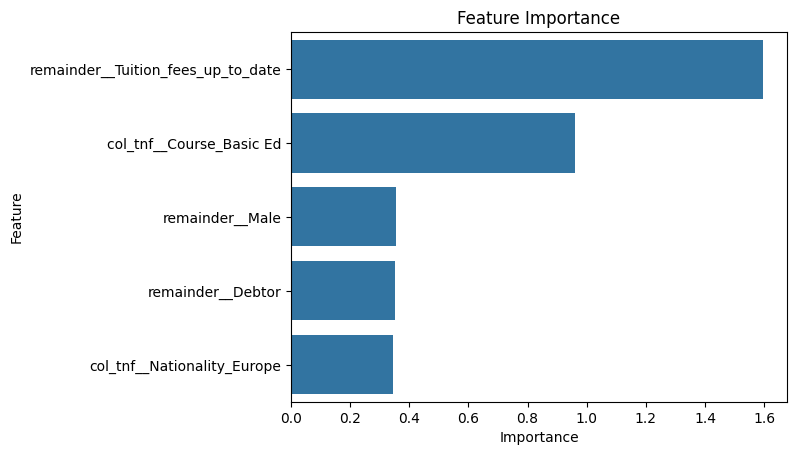

In [ ]:
from os import pipe
importance_list = pipe_lr.named_steps['step2'].coef_[0]

print(len(importance_list))

co = pipe_lda.named_steps['step1'].get_feature_names_out()


feature_importance = pd.DataFrame({'Feature': co, 'Importance': np.abs(importance_list)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(5)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

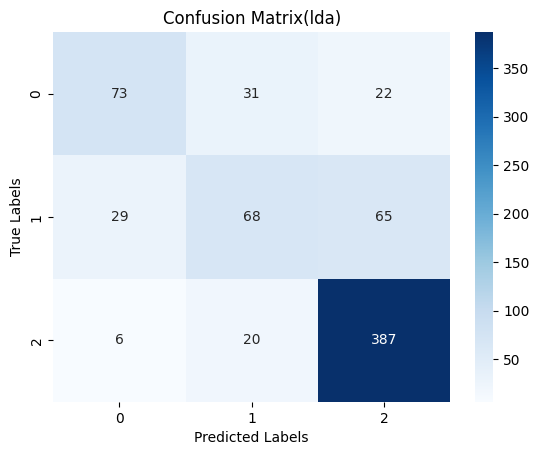

In [ ]:
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix(lda)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

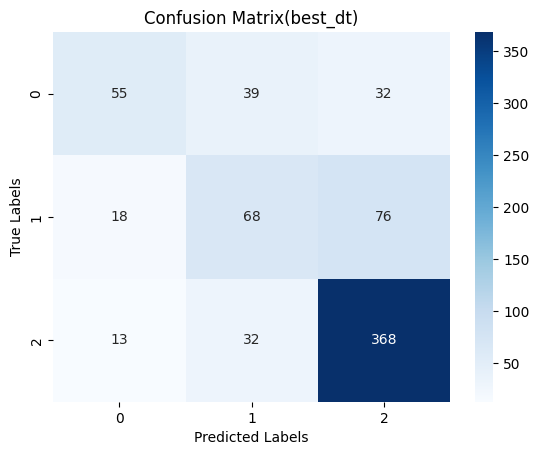

In [ ]:
sns.heatmap(best_dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix(best_dt)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import joblib

filename = 'finalized_model.sav'
joblib.dump(pipe_lr, filename)

['finalized_model.sav']

In [ ]:
df.sample(1)

Application_mode  Application_order           Course  \
3119  Admission Phases & Contingents                  1  Agriculture/Vet   

      Previous_qualification_(grade) Nationality  Mothers_qualification  \
3119                             133      Europe                      1   

      Fathers_qualification  Mothers_occupation  Fathers_occupation  \
3119                      1                   5                   5   

      Admission_grade  ...  Age_at_enrollment  \
3119              115  ...                 21   

      Curricular_units_1st_sem_(credited)  \
3119                                    0   

      Curricular_units_1st_sem_(approved)  Curricular_units_1st_sem_(grade)  \
3119                                    3                         11.333333   

      Curricular_units_2nd_sem_(credited)  \
3119                                    0   

      Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
3119                                    3                         13.333333   

      Target  Total_missed_or_dropped_units  Total_failed_units  
3119       1                              1                  16  

[1 rows x 26 columns]

In [ ]:
df.columns

Index(['Application_mode', 'Application_order', 'Course',
       'Previous_qualification_(grade)', 'Nationality',
       'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
       'Fathers_occupation', 'Admission_grade', 'Displaced',
       'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
       'Male', 'Scholarship_holder', 'Age_at_enrollment',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd_sem_(grade)', 'Target',
       'Total_missed_or_dropped_units', 'Total_failed_units'],
      dtype='object')

In [ ]:
df['Mothers_occupation'].value_counts()

Mothers_occupation
1    1339
4     968
3     448
5     326
2     302
0     118
Name: count, dtype: int64